In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import ttest_ind
import scipy.stats as stats

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/E Commerce Dataset.csv")

In [ ]:
df.head()


,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   16890 non-null  int64  
 1   Churn                        16890 non-null  int64  
 2   Tenure                       16107 non-null  float64
 3   PreferredLoginDevice         16890 non-null  object 
 4   CityTier                     16890 non-null  int64  
 5   WarehouseToHome              15555 non-null  float64
 6   PreferredPaymentMode         16290 non-null  object 
 7   Gender                       16890 non-null  object 
 8   HourSpendOnApp               16125 non-null  float64
 9   NumberOfDeviceRegistered     16290 non-null  float64
 10  PreferedOrderCat             16890 non-null  object 
 11  SatisfactionScore            16890 non-null  int64  
 12  MaritalStatus                16290 non-null  object 
 13  NumberOfAddress 

In [ ]:
df.isnull().sum()


,0
CustomerID,0
Churn,0
Tenure,783
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,1335
PreferredPaymentMode,600
Gender,0
HourSpendOnApp,765
NumberOfDeviceRegistered,600


In [ ]:
round(df.isnull().sum()/len(df)*100,1)

,0
CustomerID,0.0
Churn,0.0
Tenure,4.6
PreferredLoginDevice,0.0
CityTier,0.0
WarehouseToHome,7.9
PreferredPaymentMode,3.6
Gender,0.0
HourSpendOnApp,4.5
NumberOfDeviceRegistered,3.6


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,16890.0,52815.500000,1625.289097,50001.0,51408.00,52815.50,54223.0,55630.00
Churn,16890.0,0.168384,0.374218,0.0,0.00,0.00,0.0,1.00
Tenure,16107.0,-176.226485,1353.431459,-10000.0,2.00,9.00,16.0,61.00
CityTier,16890.0,1.654707,0.915335,1.0,1.00,1.00,3.0,3.00
WarehouseToHome,15555.0,15.671553,8.556625,5.0,9.00,14.00,21.0,127.00
HourSpendOnApp,16125.0,2.931535,0.721881,0.0,2.00,3.00,3.0,5.00
NumberOfDeviceRegistered,16290.0,3.686740,1.024065,1.0,3.00,4.00,4.0,6.00
SatisfactionScore,16890.0,10470.403552,77841.558859,1.0,2.00,3.00,4.0,589314.00
NumberOfAddress,16890.0,4.214032,2.583433,1.0,2.00,3.00,6.0,22.00
Complain,16890.0,0.284902,0.451381,0.0,0.00,0.00,1.0,1.00


In [ ]:
df.duplicated().sum()


11260

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

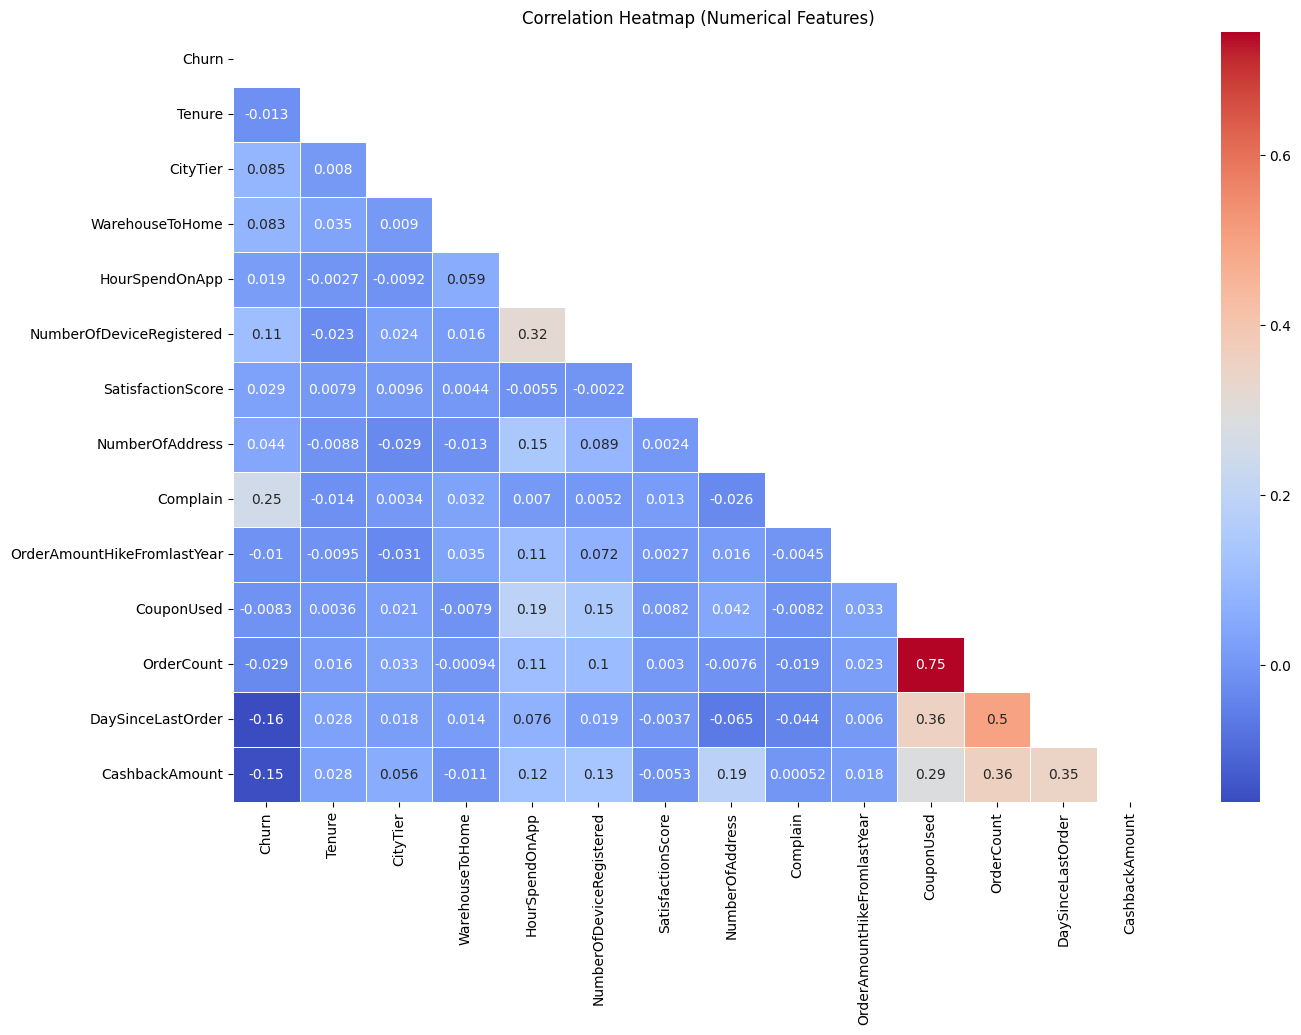

In [ ]:


# Identify numerical and categorical columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Drop categorical columns + 'CustomerID' safely
df2 = df.drop(columns=['CustomerID'] + categorical, axis=1)

# Compute correlation mask
mask = np.triu(df2.corr())

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True, mask=mask, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()



In the Churn You can see that Complain , Day Since Last Order , Cash back Amount  , Number Of device Registered

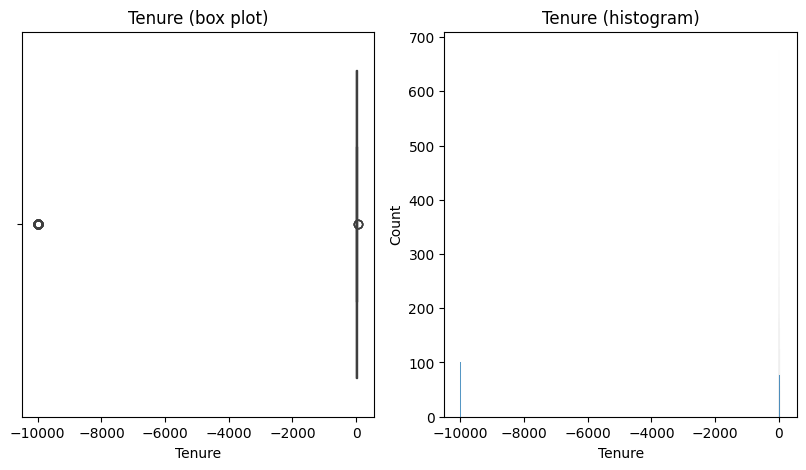

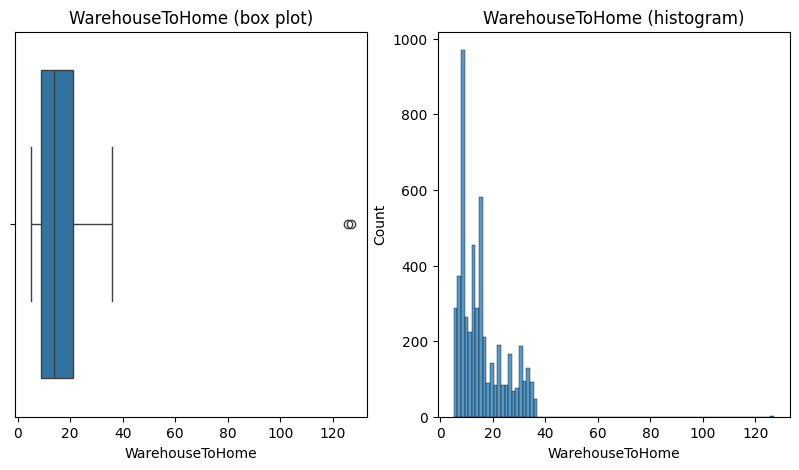

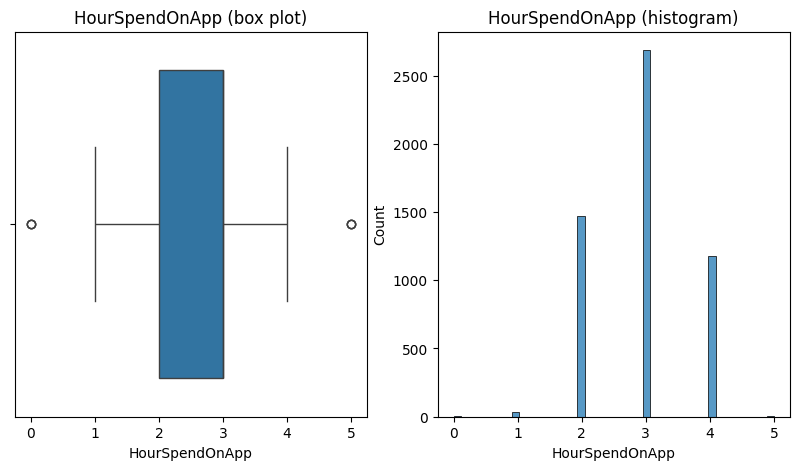

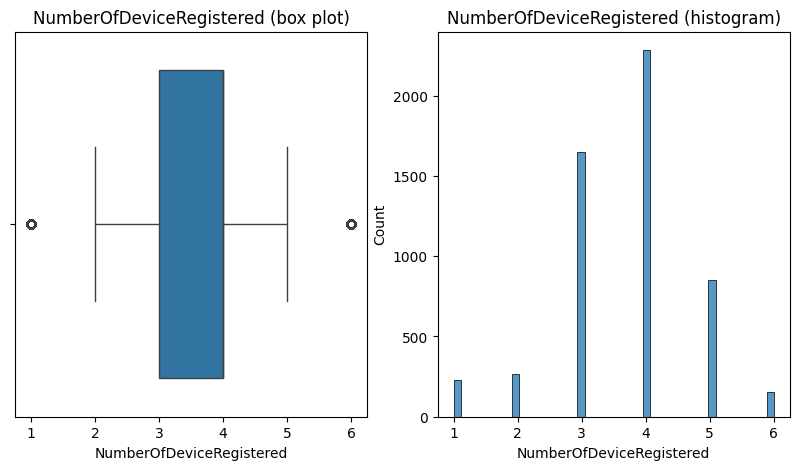

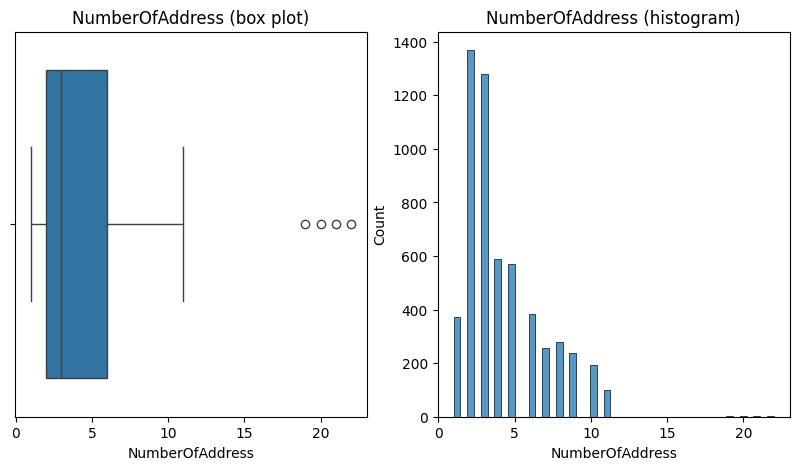

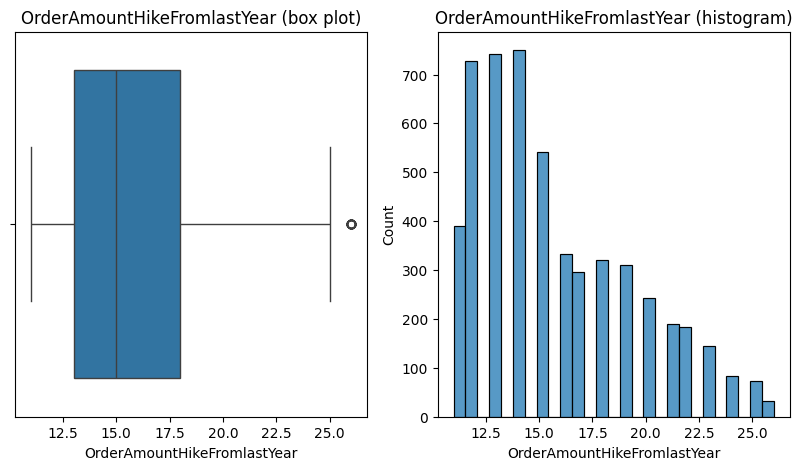

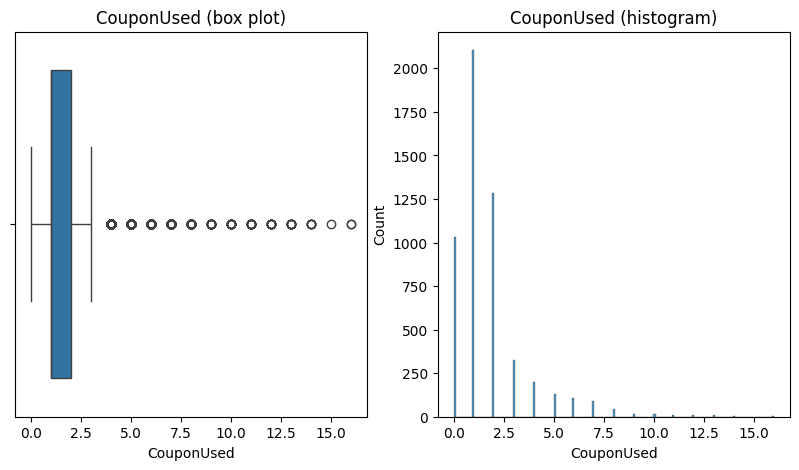

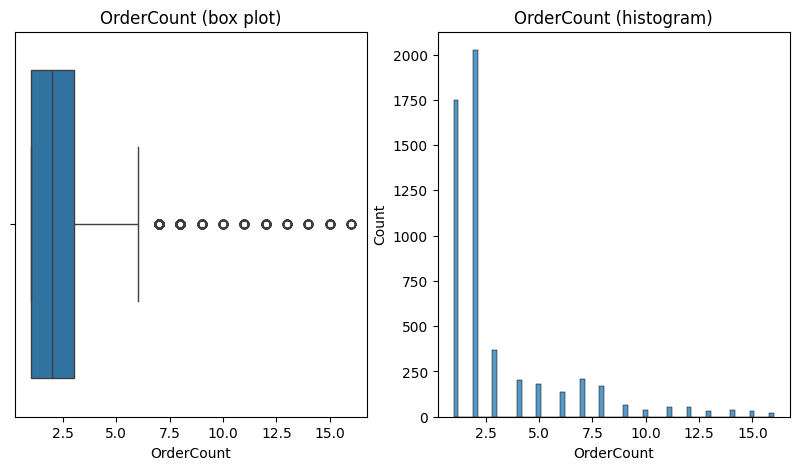

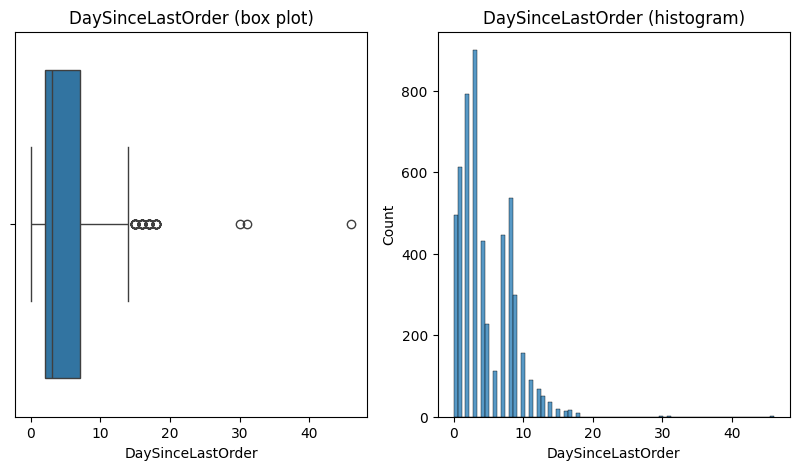

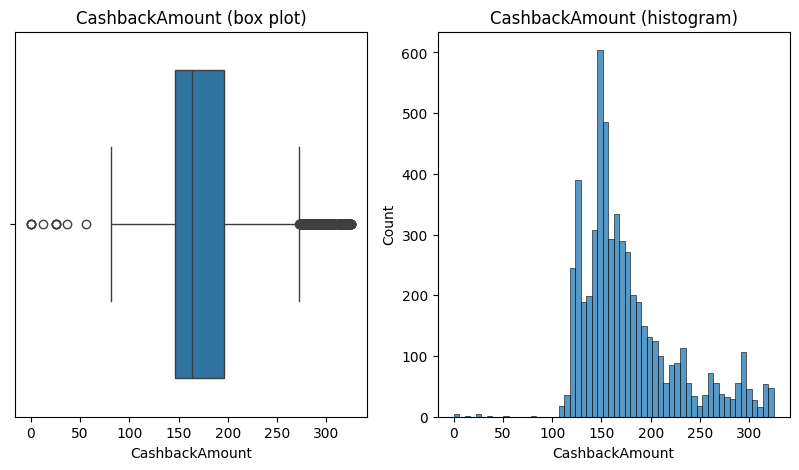

In [ ]:
exclude_cols = ['CustomerID', 'Churn','Complain', 'CityTier','SatisfactionScore']

for i in df.columns:
 if (df[i].dtype != 'object') & (i not in exclude_cols):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

    sns.boxplot(x=df[i], ax=axs[0])
    axs[0].set_title(i + ' (box plot)')

    sns.histplot(x=df[i], kde=False, ax=axs[1])
    axs[1].set_title(i + ' (histogram)')

    plt.show()

Numerical variables validation:¶
All outliers/distributions are logical but:

Tenure : have 100 values less than 0, there's also outliers (50,51,60,61).

WarehouseToHome: have two outliers (126,127) but it could be normal because maybe the customer lives far from the warehouse.

NumberOfAddress:have four outliers (19,20,21,22) it's not very logical for a customer to have alot of address but it could be normal as customer chooses to deliver the order in a specific address.

In [ ]:
for i in df.columns:
 if(df[i].dtype == 'object'):
    print(df[i].value_counts())
    print('\n')

PreferredLoginDevice
Mobile Phone    2735
Computer        1620
Phone           1225
0                 50
Name: count, dtype: int64


PreferredPaymentMode
Debit Card          2229
Credit Card         1449
E wallet             597
UPI                  392
COD                  356
CC                   263
Cash on Delivery     144
Name: count, dtype: int64


Gender
Male      3187
Female    2143
m          197
f          103
Name: count, dtype: int64


PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus
Married     2879
Single      1726
Divorced     825
Name: count, dtype: int64




Categorical variables validation:
Gender: needs to be consistent (m-f to male-female)

PreferredLoginDevice: needs to be consistent (mobile phone - phone ) 0 category needs to be dealt with (could be imputed with the mode/ or create 'other' category for it)

PreferedOrderCat: needs to be consistent ( Mobile phone and mobile are the same thing)

PreferredPaymentMode: needs to be consistent (CC - COD)

SatisfactionScore: '589314' category needs to be dealt with

In [ ]:
df['Gender'].unique()


array(['Female', 'Male', 'f', 'm'], dtype=object)

In [ ]:
df['Gender'] = df['Gender'].replace('m', 'Male').replace('f', 'Female')

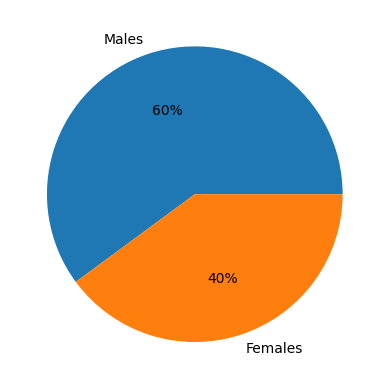

In [ ]:
m = (df['Gender'] == 'Male').sum()
f =  (df['Gender'] == 'Female').sum()
labels = ['Males', 'Females']
plt.pie([m, f], labels= labels, autopct='%.0f%%')
plt.show()

<Axes: xlabel='PreferredLoginDevice', ylabel='count'>

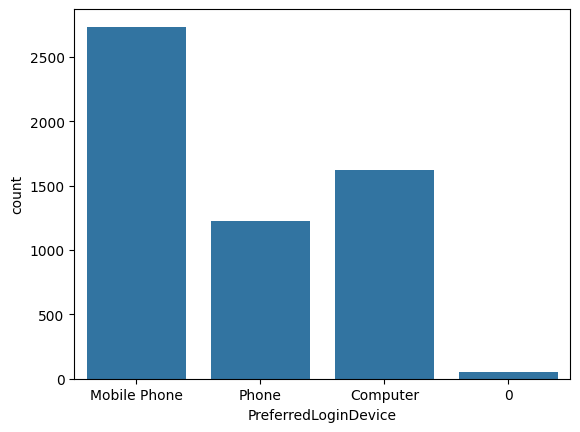

In [ ]:
sns.countplot(x=df["PreferredLoginDevice"])


In [ ]:
df['PreferredLoginDevice'] = np.where(df['PreferredLoginDevice'] == '0', df['PreferredLoginDevice'].mode() , df['PreferredLoginDevice'])

In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

<Axes: xlabel='PreferredLoginDevice', ylabel='count'>

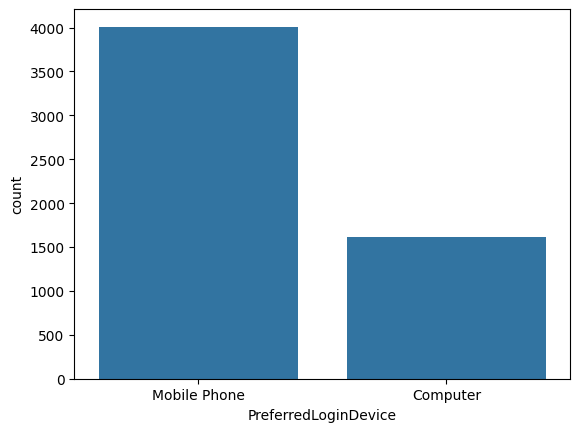

In [ ]:
sns.countplot(x=df["PreferredLoginDevice"])


<Axes: xlabel='PreferedOrderCat', ylabel='count'>

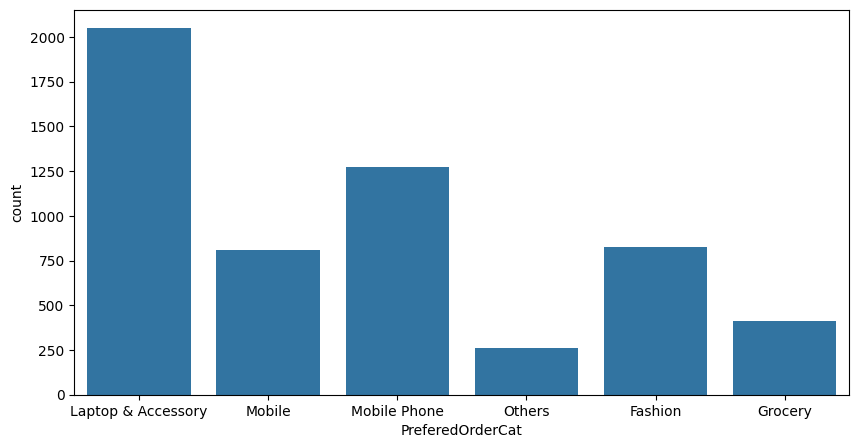

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["PreferedOrderCat"])

In [ ]:
df['PreferedOrderCat'] = np.where(df['PreferedOrderCat'] == 'Mobile', 'Mobile Phone' , df['PreferedOrderCat'])

<Axes: xlabel='PreferedOrderCat', ylabel='count'>

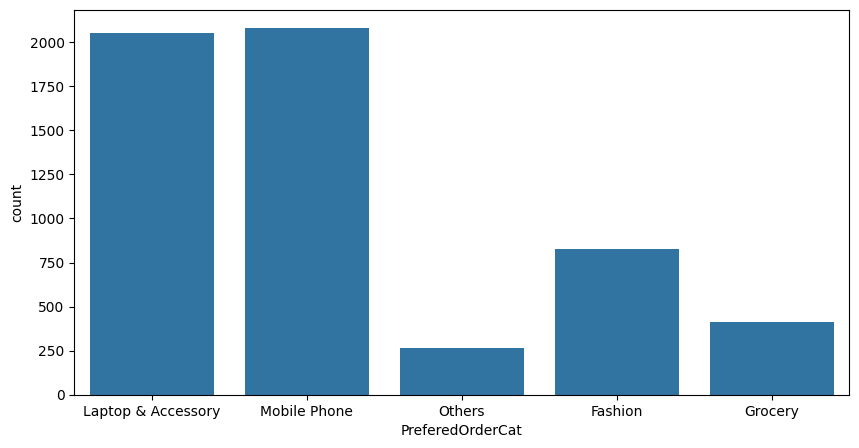

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["PreferedOrderCat"])

In [ ]:
df['PreferredPaymentMode'].unique()


array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card', nan], dtype=object)

In [ ]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card').replace('COD', 'Cash on Delivery')

<Axes: >

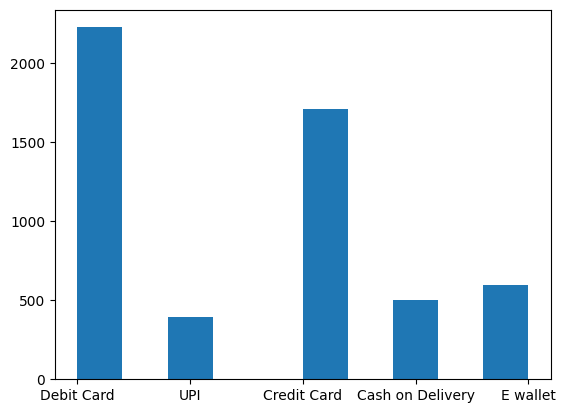

In [ ]:
df['PreferredPaymentMode'].hist(grid=False)


In [ ]:
df.isna().sum()


,0
CustomerID,0
Churn,0
Tenure,261
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,445
PreferredPaymentMode,200
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,200


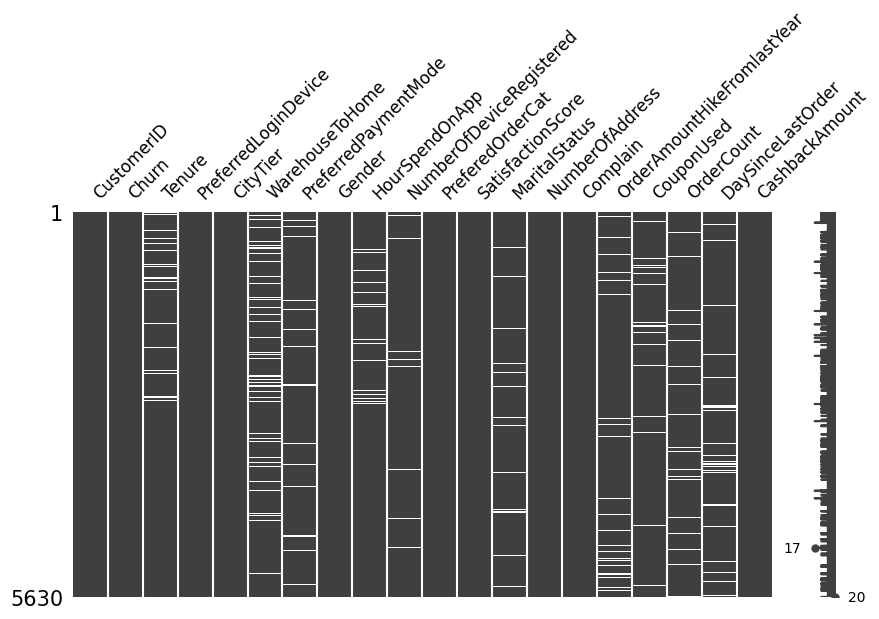

In [ ]:
import missingno as msno
msno.matrix(df,figsize=(10,5), fontsize=12);

Cashback Amount Missing Pattern :


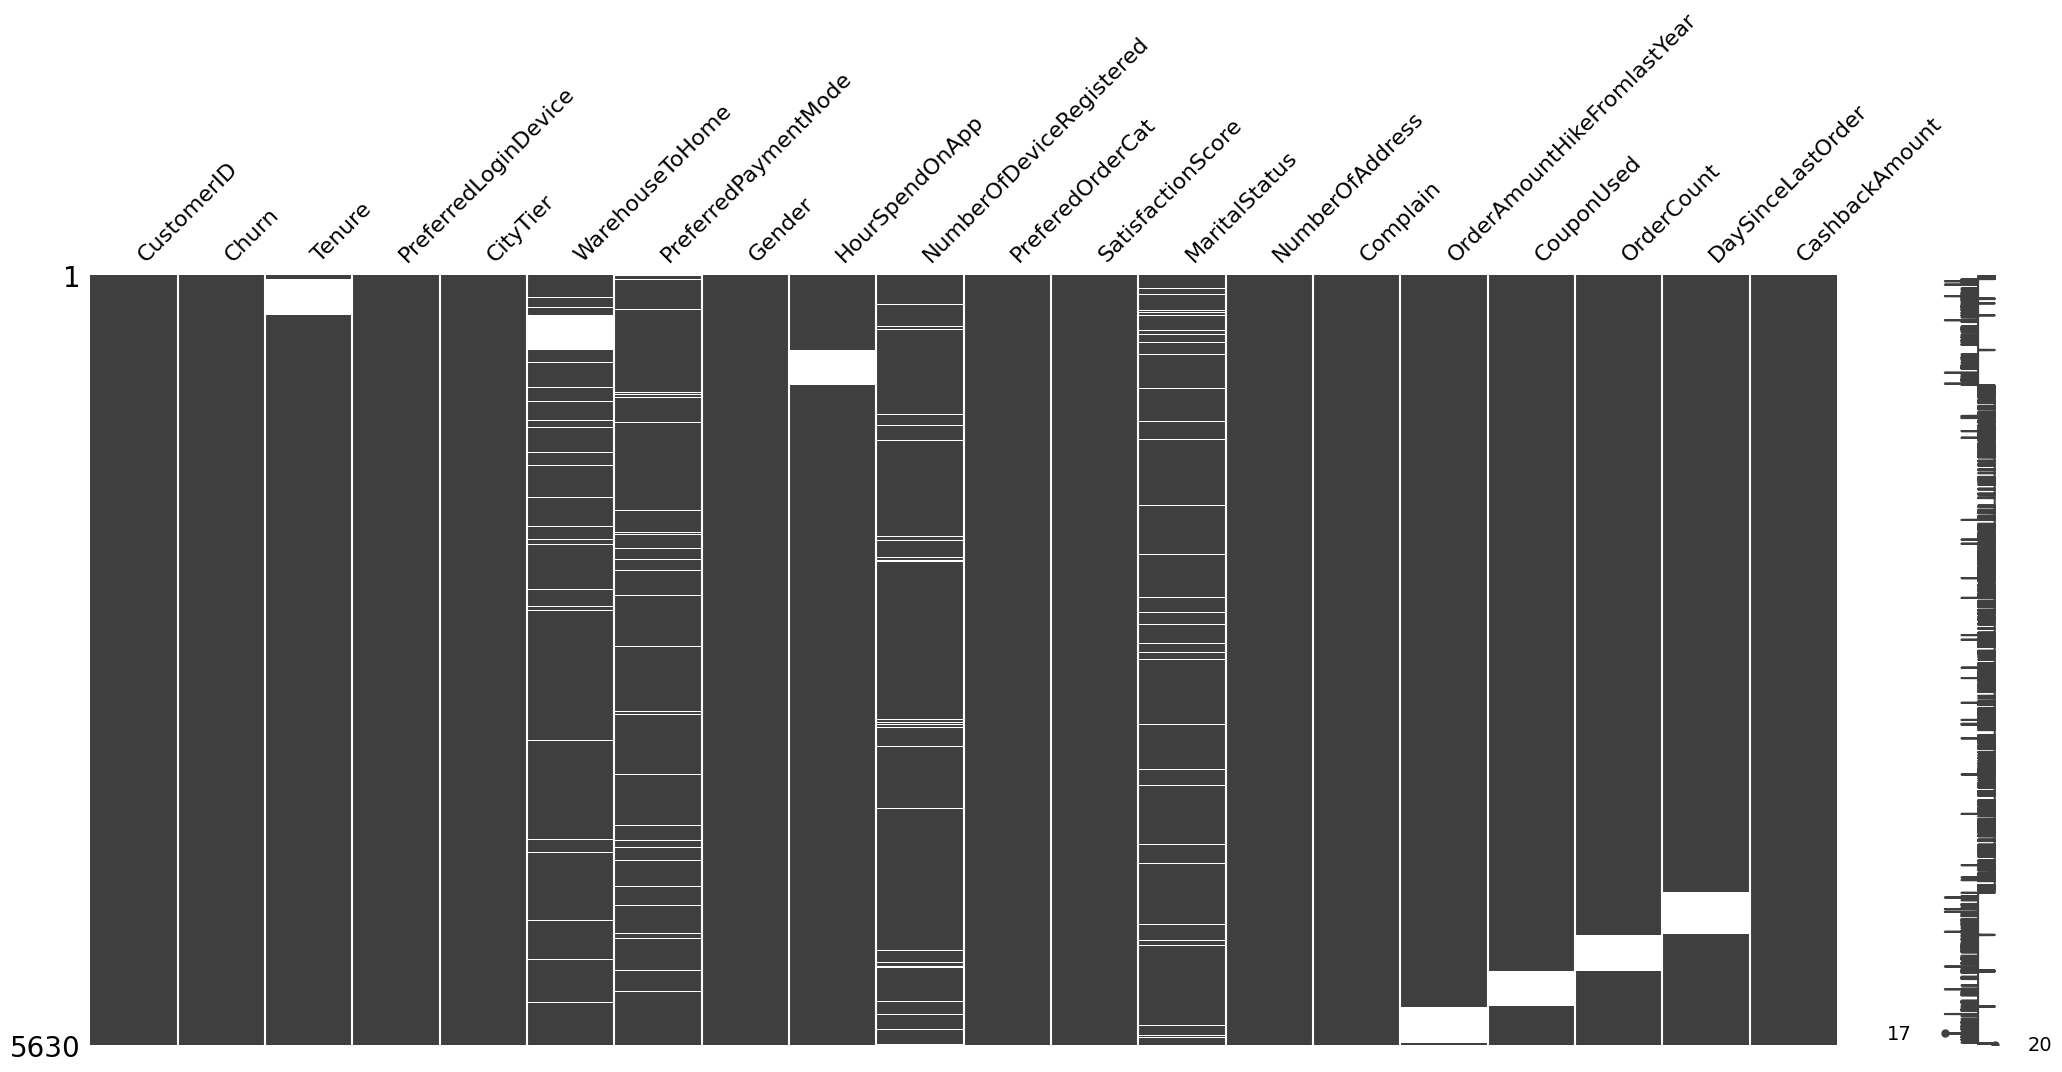

In [ ]:
print("Cashback Amount Missing Pattern :")
msno.matrix(df.sort_values(by='CashbackAmount'))
plt.show()

In [ ]:
df.sort_values(by='CashbackAmount')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1176,51177,0,30.0,Computer,3,8.0,Credit Card,Male,2.0,3.0,Grocery,4,Married,5,0,22.0,10.0,14.0,14.0,0.00
101,50102,0,10.0,Computer,3,10.0,E wallet,Male,2.0,3.0,Mobile Phone,2,Married,5,0,17.0,1.0,5.0,8.0,0.00
1026,51027,0,1.0,Mobile Phone,1,33.0,Credit Card,Female,2.0,5.0,Laptop & Accessory,5,Married,1,0,21.0,1.0,1.0,0.0,0.00
1255,51256,0,8.0,Mobile Phone,3,24.0,NaN,Male,3.0,3.0,Laptop & Accessory,5,Married,1,0,16.0,0.0,1.0,4.0,0.00
1300,51301,0,6.0,Mobile Phone,1,21.0,Credit Card,Female,3.0,3.0,Laptop & Accessory,1,Married,1,1,13.0,5.0,8.0,1.0,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,55012,0,30.0,Mobile Phone,1,11.0,Cash on Delivery,Female,4.0,4.0,Others,5,Married,6,0,14.0,5.0,5.0,3.0,324.43
4906,54907,0,15.0,Computer,1,14.0,Debit Card,Female,3.0,NaN,Others,3,Married,3,0,23.0,6.0,6.0,11.0,324.73
3436,53437,0,15.0,Computer,1,14.0,Debit Card,Female,3.0,6.0,Others,3,Married,3,0,23.0,2.0,6.0,11.0,324.73
2880,52881,0,26.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,5.0,Others,3,NaN,2,0,15.0,2.0,12.0,10.0,324.99


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

vars_with_missing = ['DaySinceLastOrder', 'OrderCount','CouponUsed','OrderAmountHikeFromlastYear','HourSpendOnApp','Tenure','WarehouseToHome','NumberOfDeviceRegistered']

df_missing = df[vars_with_missing]

# Create an instance of the IterativeImputer class
imputer = IterativeImputer( estimator=knn,random_state=0)

# Fit the imputer to the data
imputer.fit(df_missing)

# Generate imputed values for each missing data point
imputed_data = imputer.transform(df_missing)

# Combine imputed data sets to obtain a single data set with imputed values
df_imputed = pd.concat([df.drop(vars_with_missing, axis=1), pd.DataFrame(imputed_data, columns=vars_with_missing)], axis=1)

df_imputed['PreferredPaymentMode'].fillna(df_imputed['PreferredPaymentMode'].mode()[0], inplace=True)
df_imputed['MaritalStatus'].fillna(df_imputed['MaritalStatus'].mode()[0], inplace=True)

In [ ]:
df2 = df_imputed.copy()
df2.isnull().sum()

,0
CustomerID,0
Churn,0
PreferredLoginDevice,0
CityTier,0
PreferredPaymentMode,0
Gender,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0


<Axes: xlabel='Tenure', ylabel='count'>

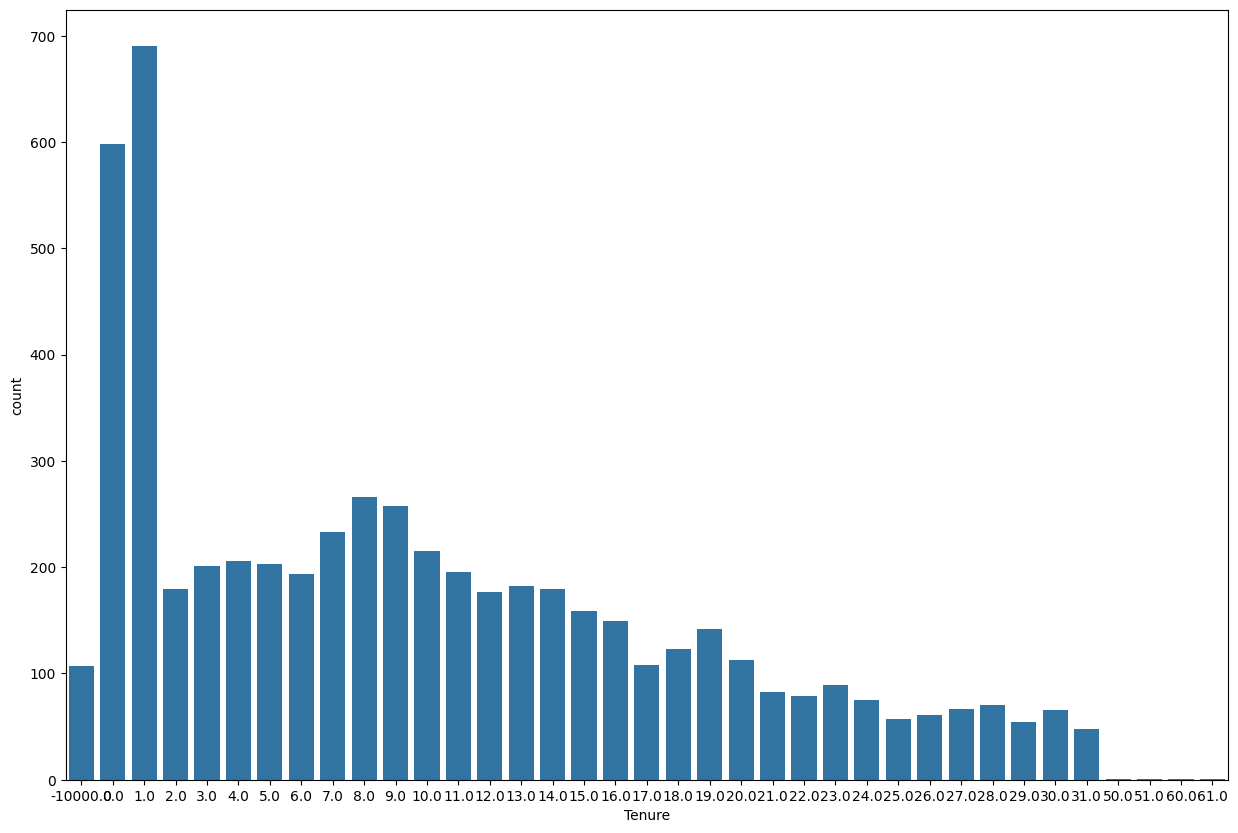

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df2, x='Tenure')

In [ ]:
def fences(df, variable_name):
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(df2, 'Tenure')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -37.0
Upper end outer fence:  54.0


In [ ]:
#Explore different quantiles at the upper end
print('90% quantile:   ', df2['Tenure'].quantile(0.90))
print('92.5% quantile: ', df2['Tenure'].quantile(0.925))
print('95% quantile:   ', df2['Tenure'].quantile(0.95))
print('97.5% quantile: ', df2['Tenure'].quantile(0.975))
print('99% quantile:   ', df2['Tenure'].quantile(0.99))
print('99.9% quantile: ', df2['Tenure'].quantile(0.999))

90% quantile:    23.0
92.5% quantile:  25.0
95% quantile:    27.0
97.5% quantile:  29.0
99% quantile:    30.0
99.9% quantile:  31.0


In [ ]:
from scipy.stats.mstats import winsorize

#Winsorize on right-tail
winsorize(df2['Tenure'], limits=(0.05, 0.05), inplace=True)

df2['Tenure'].describe()

,Tenure
count,5630.000000
mean,9.677620
std,8.278076
min,0.000000
25%,2.000000
50%,8.000000
75%,15.000000
max,27.000000


In [ ]:
print('99.9% quantile: ', df2['Tenure'].quantile(0.999))


99.9% quantile:  27.0


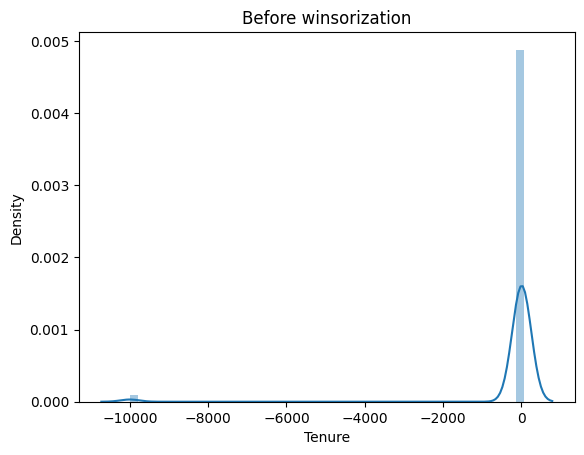

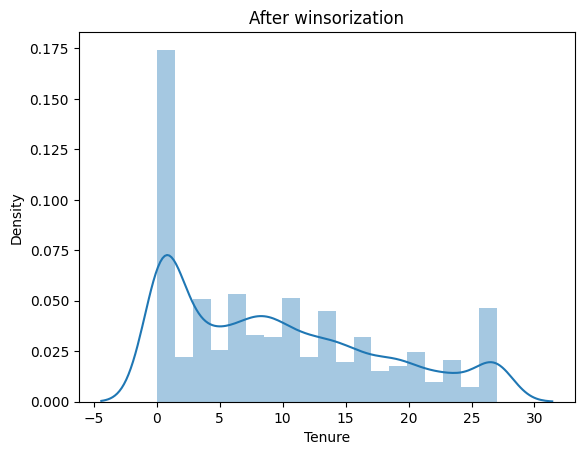

In [ ]:
#Distribution plot: Tenure
sns.distplot(df['Tenure'])
plt.title("Before winsorization")
plt.show()

#New distribution plots
sns.distplot(df2['Tenure'])
plt.title("After winsorization")
plt.show()

<Axes: ylabel='Tenure'>

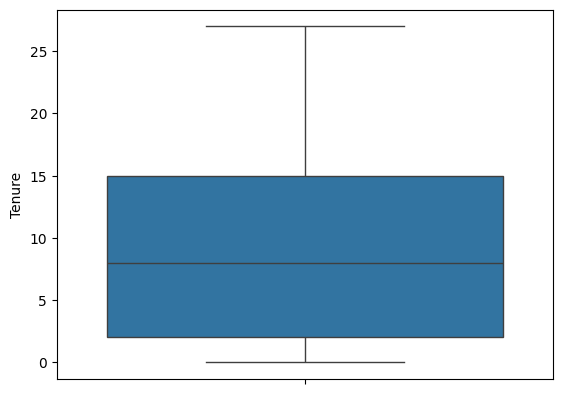

In [ ]:
sns.boxplot(df2['Tenure'])


In [ ]:
df2['SatisfactionScore'].unique()


array([     2,      3, 589314,      5,      4,      1])

In [ ]:
df2['SatisfactionScore'] = np.where(df2['SatisfactionScore']==589314, 3, df2['SatisfactionScore'])

<Axes: ylabel='SatisfactionScore'>

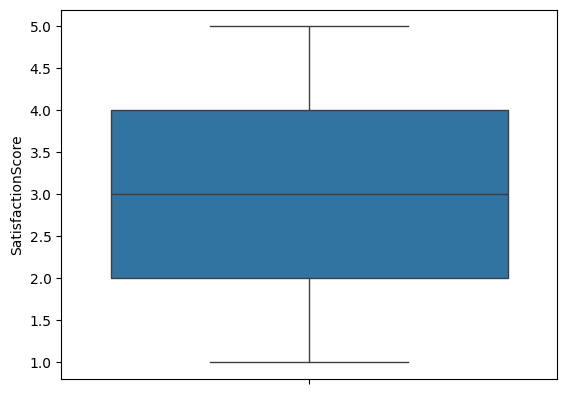

In [ ]:
sns.boxplot(df2['SatisfactionScore'])


In [ ]:
new_df = df2.copy()
new_df.head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CashbackAmount,DaySinceLastOrder,OrderCount,CouponUsed,OrderAmountHikeFromlastYear,HourSpendOnApp,Tenure,WarehouseToHome,NumberOfDeviceRegistered
0,50001,1,Mobile Phone,3,Debit Card,Female,Laptop & Accessory,2,Single,9,1,159.93,5.0,1.0,1.0,11.0,3.0,4.0,6.0,3.0
1,50002,1,Mobile Phone,1,UPI,Male,Mobile Phone,3,Single,7,1,120.90,0.0,1.0,0.0,15.0,3.0,0.0,8.0,4.0
2,50003,1,Mobile Phone,1,Debit Card,Male,Mobile Phone,3,Single,6,1,120.28,3.0,1.0,0.0,14.0,2.0,17.0,30.0,4.0
3,50004,1,Mobile Phone,3,Debit Card,Male,Laptop & Accessory,3,Single,8,0,134.07,3.0,1.0,0.0,23.0,2.0,0.0,15.0,4.0
4,50005,1,Mobile Phone,1,Credit Card,Male,Mobile Phone,5,Single,3,0,129.60,3.0,1.0,1.0,11.0,3.0,0.0,12.0,3.0


In [ ]:
new_df.to_csv('clean_data.csv',index=False)


In [ ]:
import plotly.express as px

Churn_values = new_df['Churn'].value_counts()
sizes = Churn_values.values

fig = px.pie(new_df, values=sizes, names=['Not Churned','Churned'] )
fig.show()

In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(new_df['CityTier'], new_df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn        0    1
CityTier           
1         3134  532
2          194   48
3         1354  368


Chi-square statistic: 40.982404247736355
Degrees of freedom: 2
p-value: 1.2612000812079956e-09


In [ ]:
citytier_mean = round(new_df.groupby("CityTier")["Churn"].mean()*100,2).reset_index()
citytier_mean

,CityTier,Churn
0,1,14.51
1,2,19.83
2,3,21.37


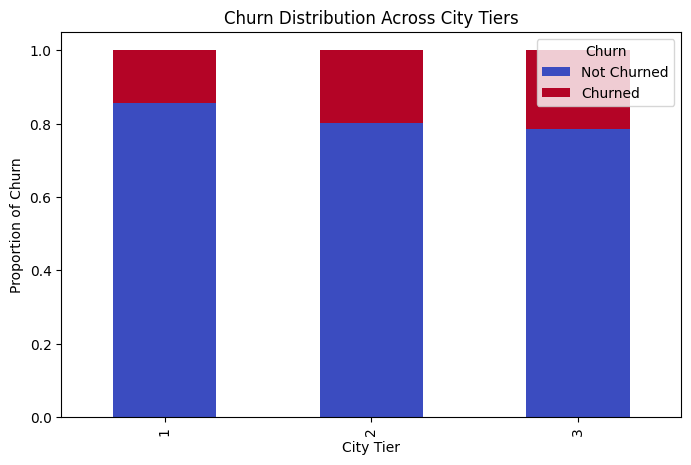

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize to get percentages
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot
contingency_table_norm.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))
plt.title("Churn Distribution Across City Tiers")
plt.xlabel("City Tier")
plt.ylabel("Proportion of Churn")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])
plt.show()


In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(new_df['MaritalStatus'], new_df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn             0    1
MaritalStatus           
Divorced        703  122
Married        2712  367
Single         1267  459


Chi-square statistic: 172.96971045652424
Degrees of freedom: 2
p-value: 2.754892179417957e-38


In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(new_df['MaritalStatus'], new_df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn             0    1
MaritalStatus           
Divorced        703  122
Married        2712  367
Single         1267  459


Chi-square statistic: 172.96971045652424
Degrees of freedom: 2
p-value: 2.754892179417957e-38


In [ ]:
MS_mean = round(new_df.groupby("MaritalStatus")["Churn"].mean()*100,2).reset_index()
MS_mean

,MaritalStatus,Churn
0,Divorced,14.79
1,Married,11.92
2,Single,26.59


In [ ]:
contingency_table = pd.crosstab(df['Gender'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn      0    1
Gender           
Female  1898  348
Male    2784  600


Chi-square statistic: 4.662908495367532
Degrees of freedom: 1
p-value: 0.030820940334890086


In [ ]:
G_mean = round(new_df.groupby("Gender")["Churn"].mean()*100,2).reset_index()
G_mean

,Gender,Churn
0,Female,15.49
1,Male,17.73


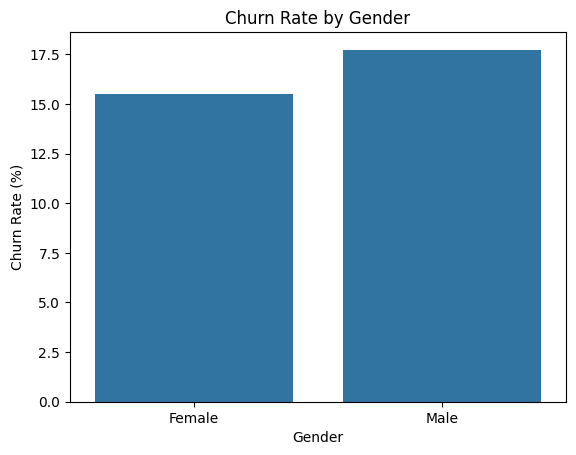

In [ ]:
sns.barplot(x="Gender", y="Churn" , data = G_mean )

# set the axis labels and title
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Gender")

# show the plot
plt.show()

In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['PreferredLoginDevice'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn                    0    1
PreferredLoginDevice           
Computer              1301  319
Mobile Phone          3381  629


Chi-square statistic: 12.936281980683724
Degrees of freedom: 1
p-value: 0.0003222744573838018


In [ ]:
PLD_mean = round(new_df.groupby("PreferredLoginDevice")["Churn"].mean()*100,2).reset_index()
PLD_mean

,PreferredLoginDevice,Churn
0,Computer,19.69
1,Mobile Phone,15.69


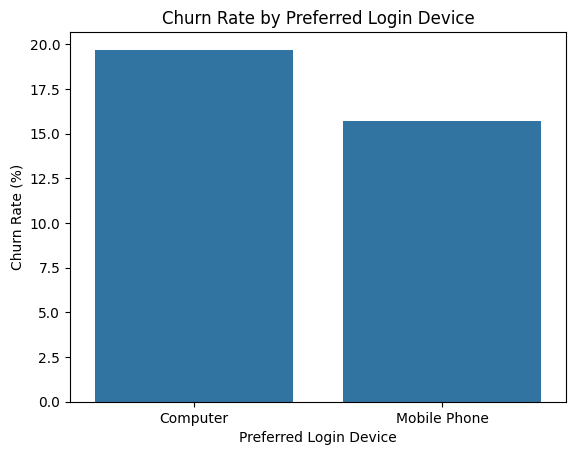

In [ ]:
sns.barplot(x="PreferredLoginDevice", y="Churn", data=PLD_mean)

# set the axis labels and title
plt.xlabel("Preferred Login Device")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Preferred Login Device")

# show the plot
plt.show()

In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['PreferredPaymentMode'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn                    0    1
PreferredPaymentMode           
Cash on Delivery       375  125
Credit Card           1469  243
Debit Card            1889  340
E wallet               462  135
UPI                    321   71


Chi-square statistic: 51.01853368757169
Degrees of freedom: 4
p-value: 2.212401219251017e-10


In [ ]:
from scipy.stats import mannwhitneyu

# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['NumberOfAddress']
non_churned_column = new_df[new_df['Churn'] == 0]['NumberOfAddress']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 2316556.5
P-value: 0.03049724563723119


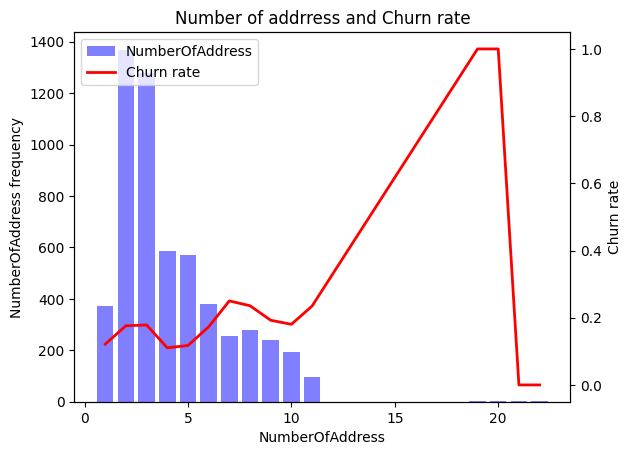

In [ ]:
# Calculate churn rate for each tenure
churn_rate = new_df.groupby('NumberOfAddress')['Churn'].mean()

# Calculate the frequency of each tenure
NumberOfAddress_freq = new_df['NumberOfAddress'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(NumberOfAddress_freq.index, NumberOfAddress_freq.values, color='blue', alpha=0.5, label='NumberOfAddress')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('NumberOfAddress')
ax1.set_ylabel('NumberOfAddress frequency')
ax2.set_ylabel('Churn rate')
plt.title('Number of addrress and Churn rate')

# Add the legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

NumberOfAddress_bins
(0, 5]      0.154656
(5, 10]     0.205033
(10, 15]    0.234694
(15, 20]    1.000000
Name: Churn, dtype: float64


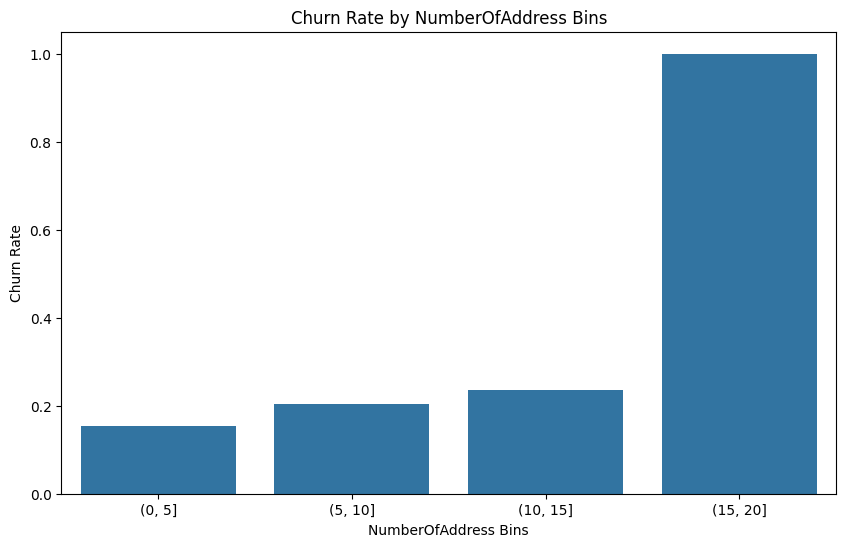

In [ ]:
# Create bins for Tenure
bins = np.arange(0, new_df['NumberOfAddress'].max() + 1, 5)
new_df['NumberOfAddress_bins'] = pd.cut(new_df['NumberOfAddress'], bins)

# Calculate churn rate for each bin
churn_rate_by_bin = new_df.groupby('NumberOfAddress_bins')['Churn'].mean()
print(churn_rate_by_bin)

# Visualize churn rate by Tenure bin
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_bin.index, y=churn_rate_by_bin.values)
plt.ylabel('Churn Rate')
plt.xlabel('NumberOfAddress Bins')
plt.title('Churn Rate by NumberOfAddress Bins')
plt.show()

In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['PreferedOrderCat'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn                  0    1
PreferedOrderCat             
Fashion              698  128
Grocery              390   20
Laptop & Accessory  1840  210
Mobile Phone        1510  570
Others               244   20


Chi-square statistic: 288.5977863034404
Degrees of freedom: 4
p-value: 3.119243404287749e-61


In [ ]:
POC_mean = round(new_df.groupby("PreferedOrderCat")["Churn"].mean()*100,2).reset_index()
POC_mean

,PreferedOrderCat,Churn
0,Fashion,15.50
1,Grocery,4.88
2,Laptop & Accessory,10.24
3,Mobile Phone,27.40
4,Others,7.58


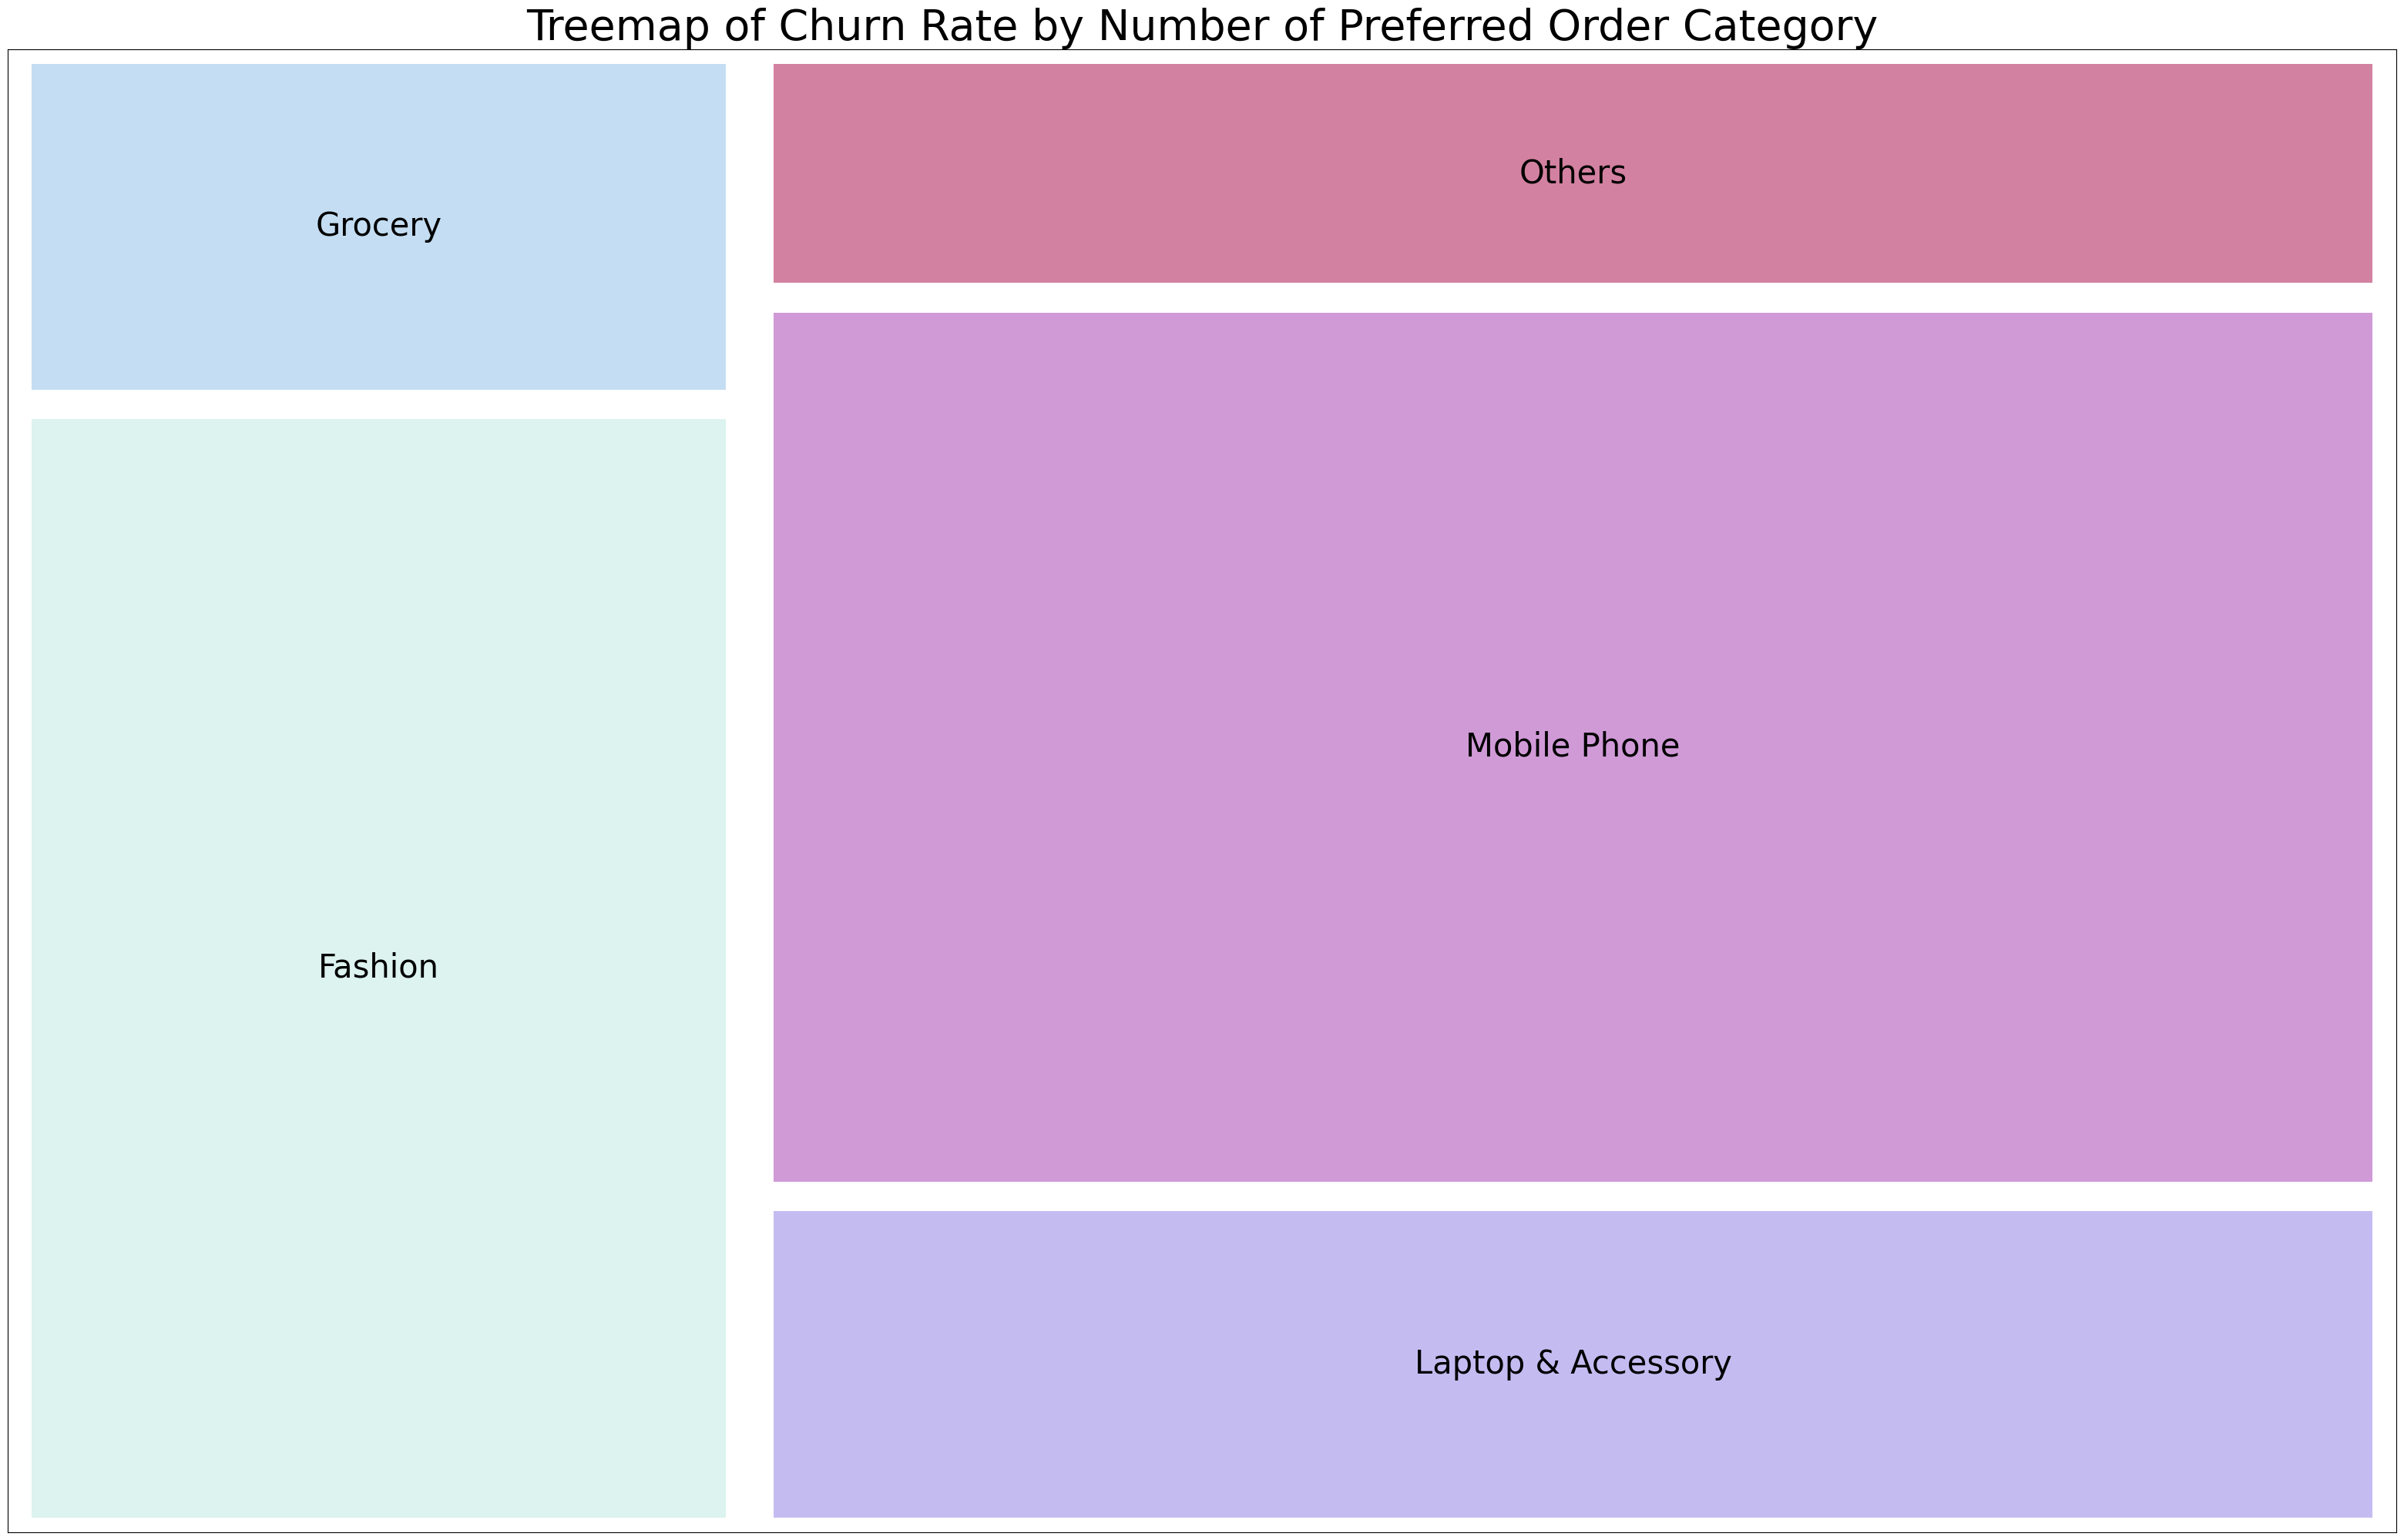

In [ ]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Assuming POC_mean is a DataFrame with "Churn" values and "PreferedOrderCat" labels
plt.figure(figsize=(40, 25))

# Create the treemap
squarify.plot(
    sizes=POC_mean["Churn"],
    label=POC_mean["PreferedOrderCat"],
    color=sns.color_palette('cubehelix_r', 12),
    alpha=1,
    pad=1,
    text_kwargs={'fontsize': 30}
)

# Get the current axis and remove ticks
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

# Set the title
plt.title("Treemap of Churn Rate by Number of Preferred Order Category", fontsize=40)

# Show the plot
plt.show()


In [ ]:
PPM_mean = round(new_df.groupby("PreferredPaymentMode")["Churn"].mean()*100,2).reset_index()
PPM_mean

,PreferredPaymentMode,Churn
0,Cash on Delivery,25.00
1,Credit Card,14.19
2,Debit Card,15.40
3,E wallet,22.61
4,UPI,18.11


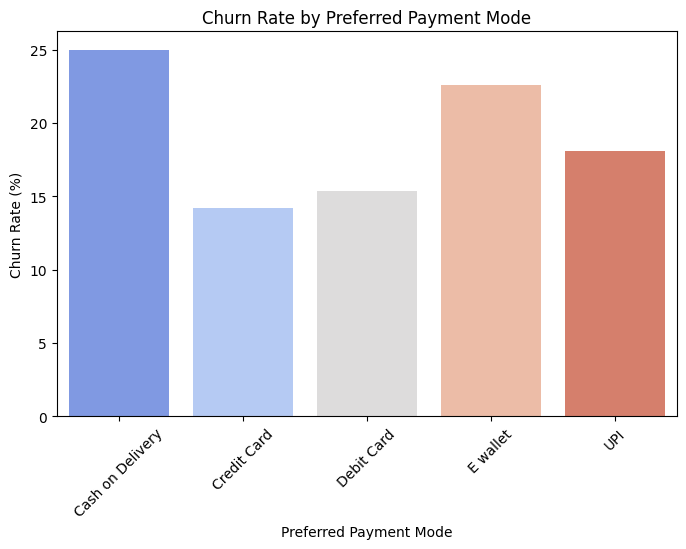

In [ ]:

# Plot the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="PreferredPaymentMode", y="Churn", data=PPM_mean, palette="coolwarm")

# Set the axis labels and title
plt.xlabel("Preferred Payment Mode")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Preferred Payment Mode")

# Show the plot
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()


In [ ]:
# Separate the data into two groups
churned_column = new_df[new_df['Churn'] == 1]['HourSpendOnApp']
non_churned_column = new_df[new_df['Churn'] == 0]['HourSpendOnApp']

# Perform t-test
statistic, p_value = ttest_ind(churned_column, non_churned_column)

# Print the results
print("t-test statistic:", statistic)
print("P-value:", p_value)

t-test statistic: 0.9048885250948009
P-value: 0.36556318038177704


In [ ]:
NODR_mean = round(new_df.groupby("NumberOfDeviceRegistered")["Churn"].mean()*100,2).reset_index()
NODR_mean

,NumberOfDeviceRegistered,Churn
0,1.0,9.21
1,2.0,10.07
2,3.0,15.01
3,4.0,16.48
4,5.0,22.58
5,6.0,33.55


In [ ]:
!pip install squarify


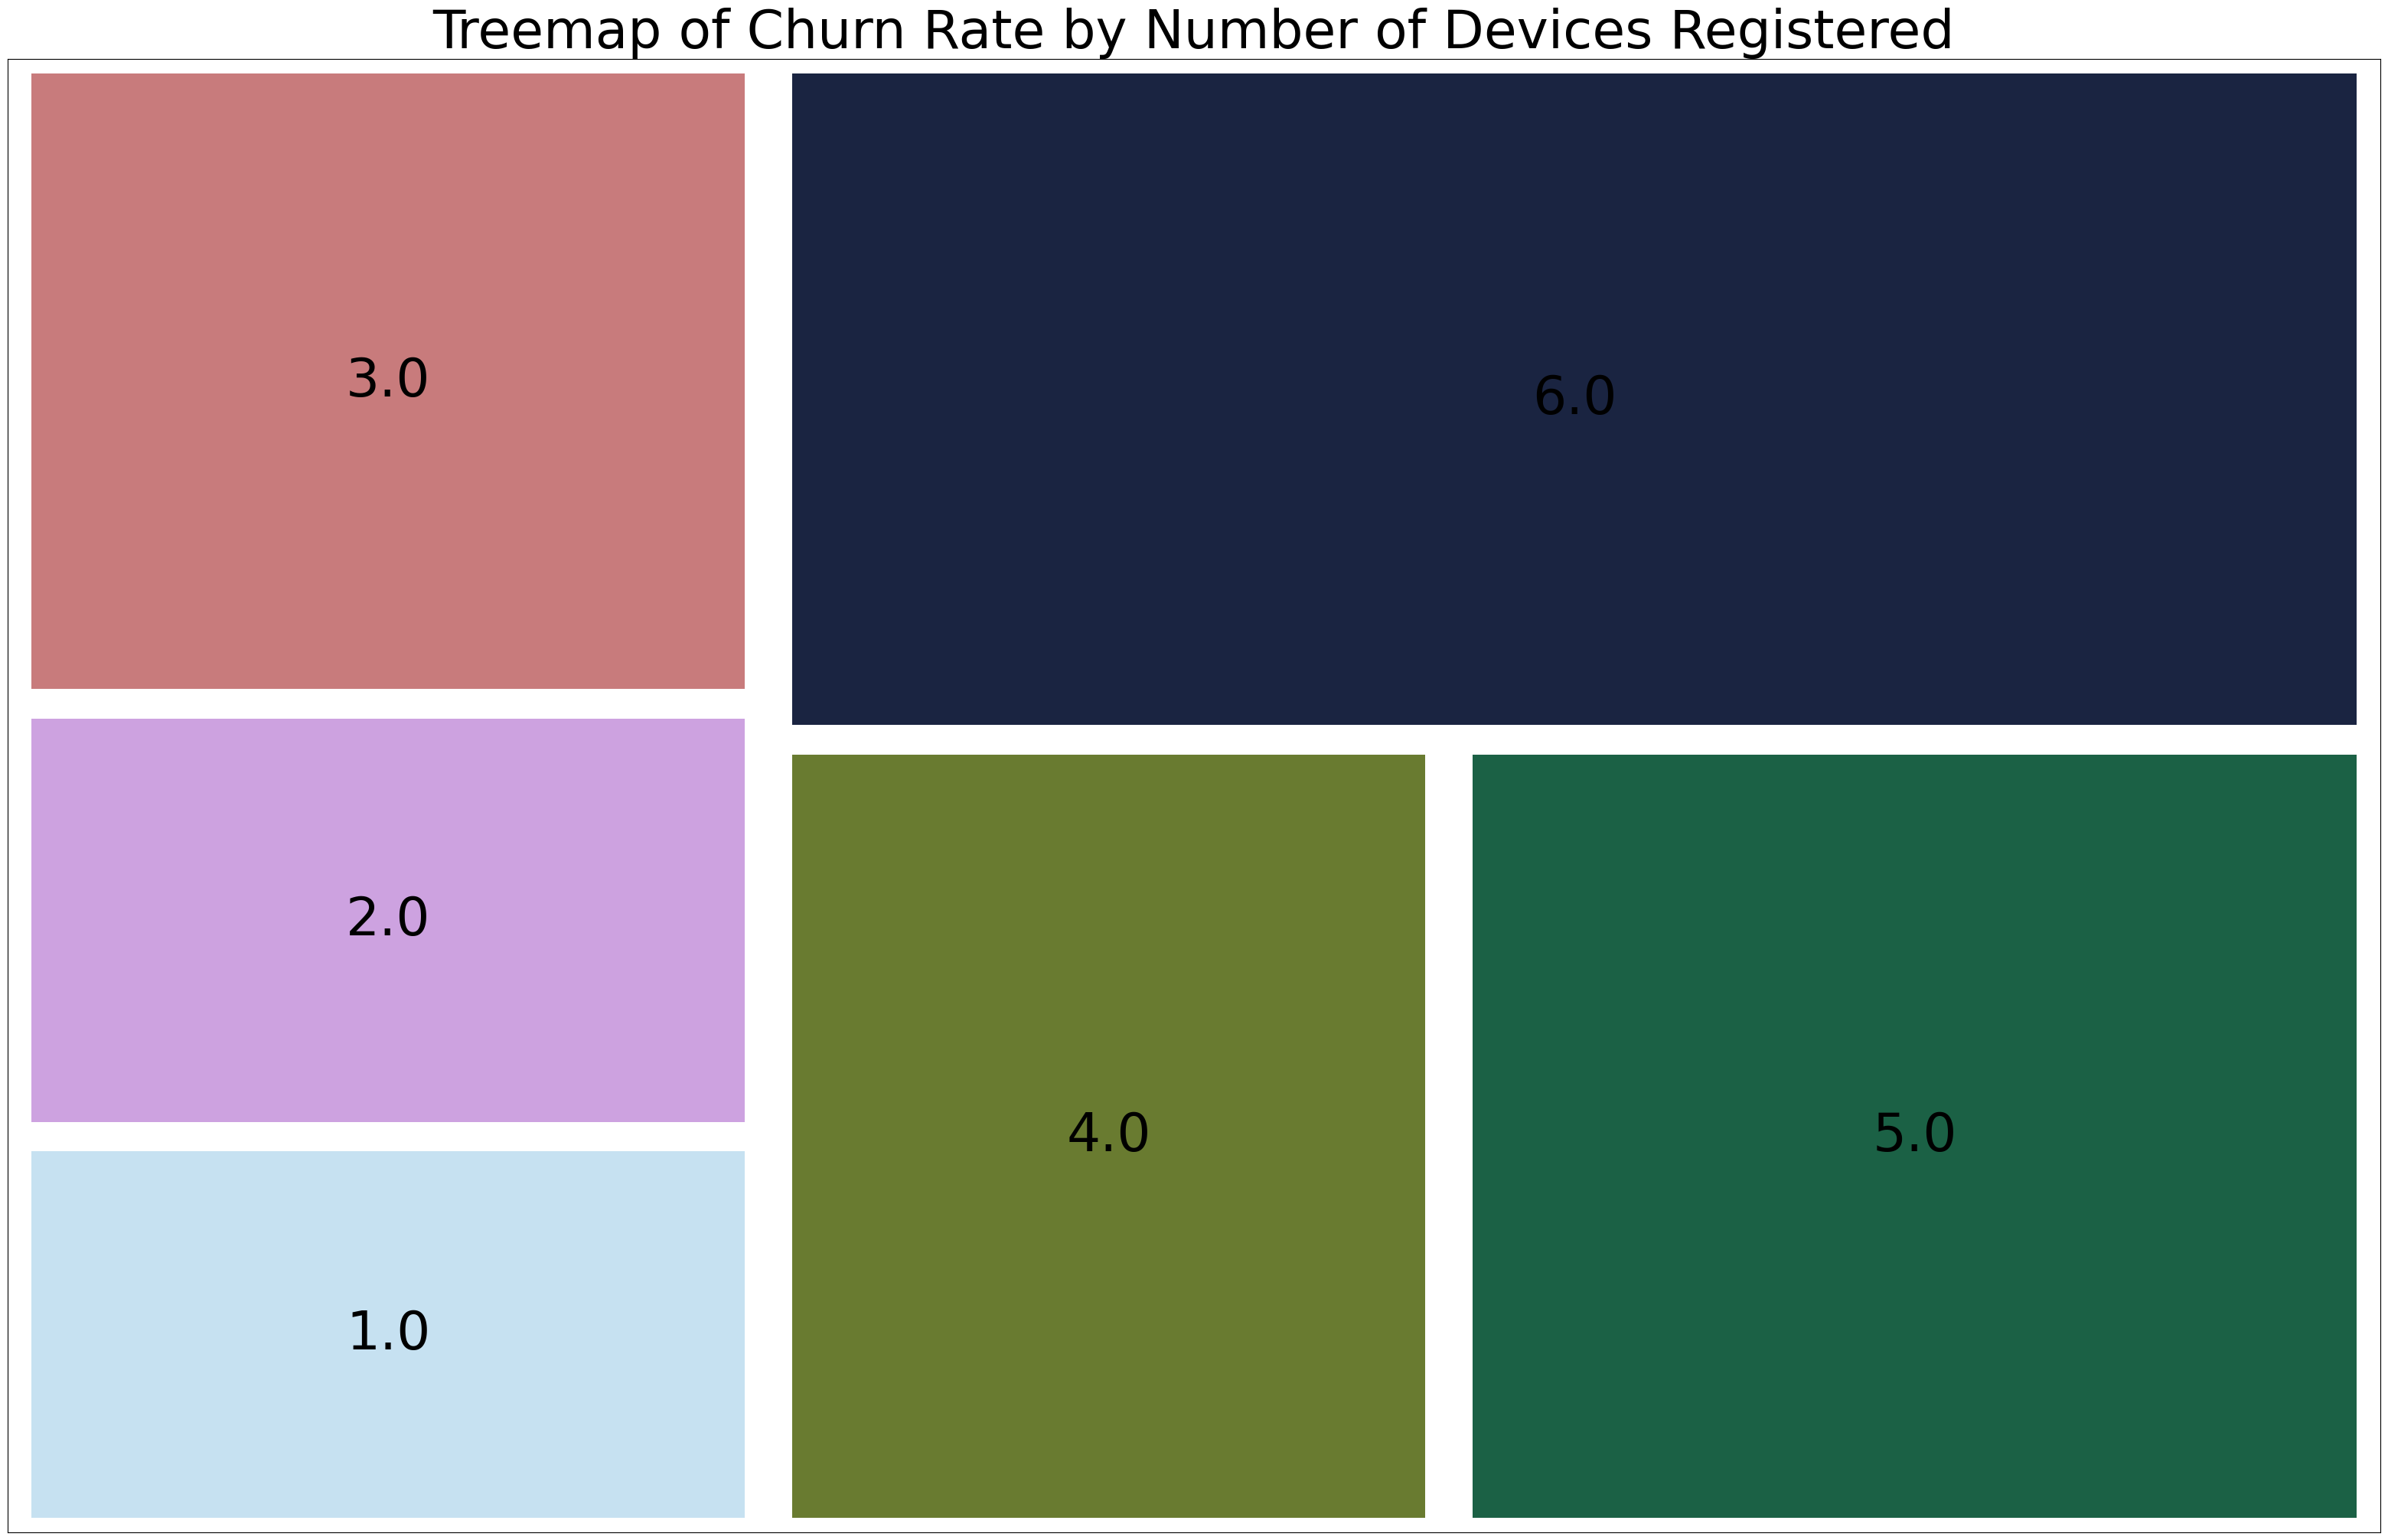

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Create the figure
fig = plt.figure(figsize=(40, 25))

# Create the treemap
squarify.plot(
    sizes=NODR_mean["Churn"],
    label=NODR_mean["NumberOfDeviceRegistered"],
    color=sns.color_palette('cubehelix_r', len(NODR_mean)),
    alpha=1,
    pad=True,
    text_kwargs={'fontsize': 50}
)

# Remove axis ticks
plt.xticks([])
plt.yticks([])

# Set the title
plt.title("Treemap of Churn Rate by Number of Devices Registered", fontsize=50)

# Show the plot
plt.show()


In [ ]:
new_df['CouponUsed'].skew()


2.517697106341016

In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['Complain'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn        0    1
Complain           
0         3586  440
1         1096  508


Chi-square statistic: 350.92545525927073
Degrees of freedom: 1
p-value: 2.6644609654641377e-78


In [ ]:
C_mean = round(new_df.groupby("Complain")["Churn"].mean()*100,2).reset_index()
C_mean

,Complain,Churn
0,0,10.93
1,1,31.67


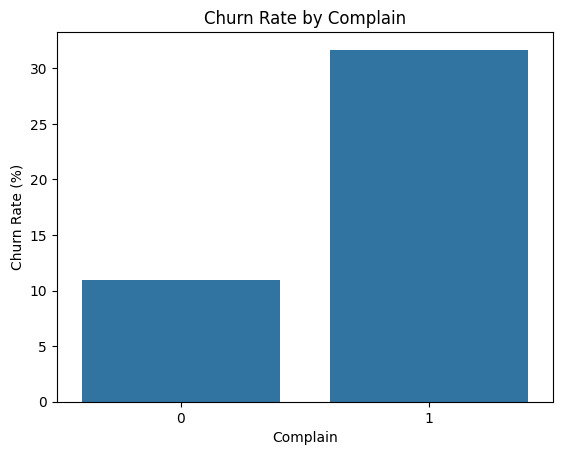

In [ ]:
sns.barplot(x="Complain", y="Churn", data=C_mean)

# set the axis labels and title
plt.xlabel("Complain")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Complain")

# show the plot
plt.show()

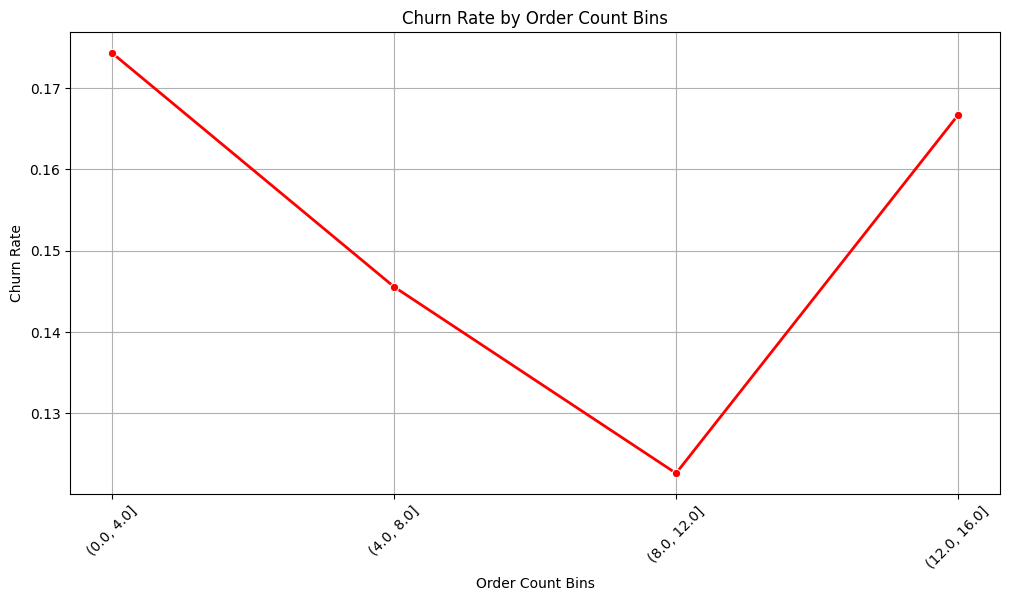

In [ ]:
# Step 1: Create bins for OrderCount
bins = np.arange(0, new_df['OrderCount'].max() + 1, 4)  # Binning every 4 units
new_df['OrderCount_bins'] = pd.cut(new_df['OrderCount'], bins)

# Step 2: Calculate churn rate for each bin
churn_rate_by_bin = new_df.groupby('OrderCount_bins')['Churn'].mean()

# Step 3: Convert bin labels to strings for proper plotting
churn_rate_by_bin.index = churn_rate_by_bin.index.astype(str)

# Step 4: Plot the churn rate using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=churn_rate_by_bin.index, y=churn_rate_by_bin.values, marker="o", linewidth=2, color="red")

# Formatting
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.ylabel('Churn Rate')
plt.xlabel('Order Count Bins')
plt.title('Churn Rate by Order Count Bins')

plt.grid(True)  # Add grid for better readability
plt.show()


In [ ]:
new_df['DaySinceLastOrder'].skew()


1.188192461586426

In [ ]:
from scipy.stats import mannwhitneyu
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['DaySinceLastOrder']
non_churned_column = new_df[new_df['Churn'] == 0]['DaySinceLastOrder']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 1621380.0
P-value: 1.0392135211226783e-39


In [ ]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['CashbackAmount']
non_churned_column = new_df[new_df['Churn'] == 0]['CashbackAmount']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 1628505.0
P-value: 2.518463732518876e-38


CashbackGroup
High    0.112256
Low     0.224512
Name: Churn, dtype: float64


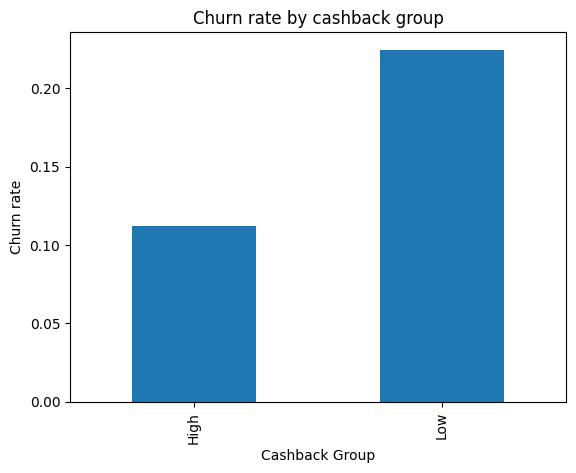

In [ ]:
cashback_median = new_df['CashbackAmount'].median()
new_df['CashbackGroup'] = np.where(new_df['CashbackAmount'] <= cashback_median, 'Low', 'High')
churn_rate_by_cashback = new_df.groupby('CashbackGroup')['Churn'].mean()
print(churn_rate_by_cashback)

churn_rate_by_cashback.plot(kind='bar')
plt.xlabel('Cashback Group')
plt.ylabel('Churn rate')
plt.title('Churn rate by cashback group')
plt.show()

In [ ]:
new_df["Tenure"].skew()


0.5980321092766222

In [ ]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['Tenure']
non_churned_column = new_df[new_df['Churn'] == 0]['Tenure']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 925678.0
P-value: 1.4209773223856094e-177


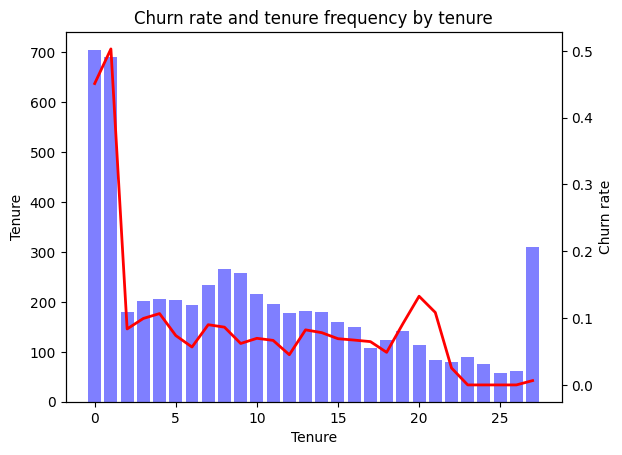

In [ ]:
# Calculate churn rate for each tenure
churn_rate = new_df.groupby('Tenure')['Churn'].mean()

# Calculate the frequency of each tenure
tenure_freq = new_df['Tenure'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(tenure_freq.index, tenure_freq.values, color='blue', alpha=0.5, label='Tenure')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Tenure')
ax2.set_ylabel('Churn rate')
plt.title('Churn rate and tenure frequency by tenure')

# Display the chart
plt.show()

Tenure_bins
(0.0, 5.0]      0.283300
(5.0, 10.0]     0.073756
(10.0, 15.0]    0.068386
(15.0, 20.0]    0.080315
(20.0, 25.0]    0.028721
Name: Churn, dtype: float64


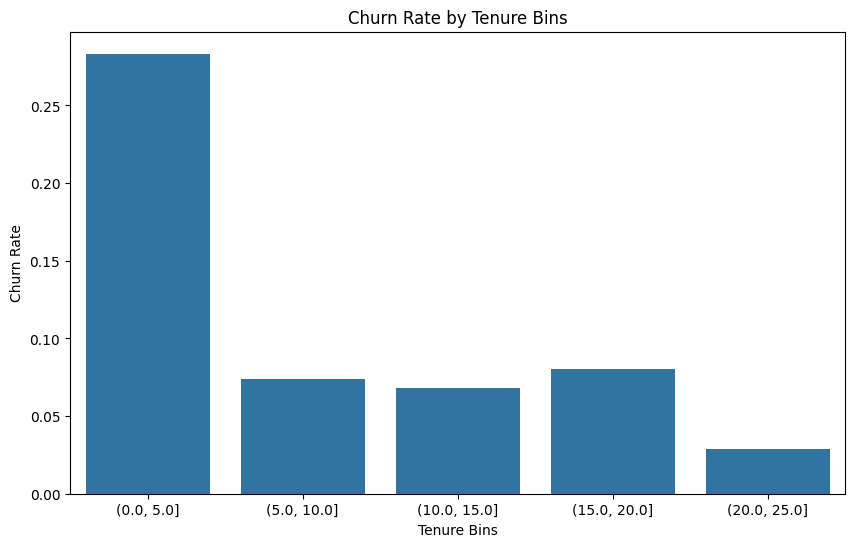

In [ ]:
#draft = new_df.copy()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for Tenure
bins = np.arange(0, new_df['Tenure'].max() + 1, 5)
new_df['Tenure_bins'] = pd.cut(new_df['Tenure'], bins)

# Calculate churn rate for each bin
churn_rate_by_bin = new_df.groupby('Tenure_bins')['Churn'].mean()
print(churn_rate_by_bin)

# Visualize churn rate by Tenure bin
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_bin.index, y=churn_rate_by_bin.values)
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Bins')
plt.title('Churn Rate by Tenure Bins')
plt.show()

Tenure_bins
(0.0, 5.0]      0.283300
(5.0, 10.0]     0.073756
(10.0, 15.0]    0.068386
(15.0, 20.0]    0.080315
(20.0, 25.0]    0.028721
Name: Churn, dtype: float64


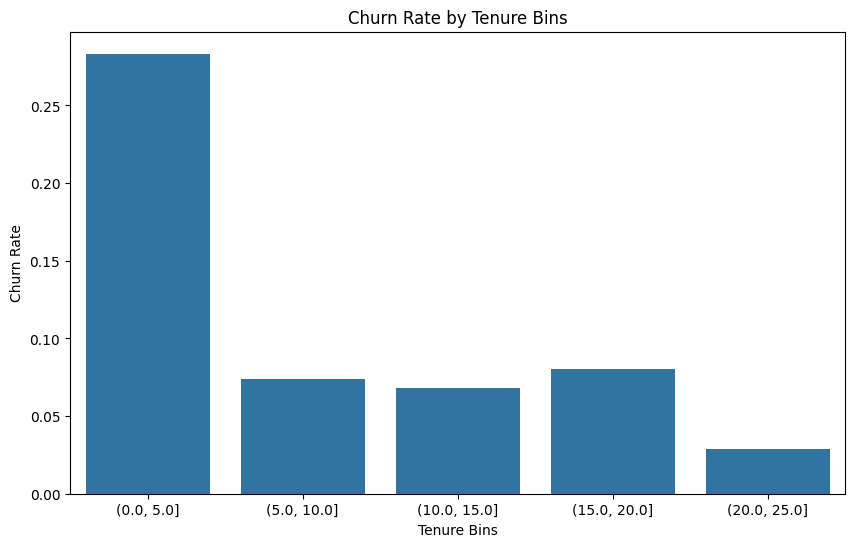

In [ ]:
# Create bins for Tenure
bins = np.arange(0, new_df['Tenure'].max() + 1, 5)
new_df['Tenure_bins'] = pd.cut(new_df['Tenure'], bins)

# Calculate churn rate for each bin
churn_rate_by_bin = new_df.groupby('Tenure_bins')['Churn'].mean()
print(churn_rate_by_bin)

# Visualize churn rate by Tenure bin
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_bin.index, y=churn_rate_by_bin.values)
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Bins')
plt.title('Churn Rate by Tenure Bins')
plt.show()

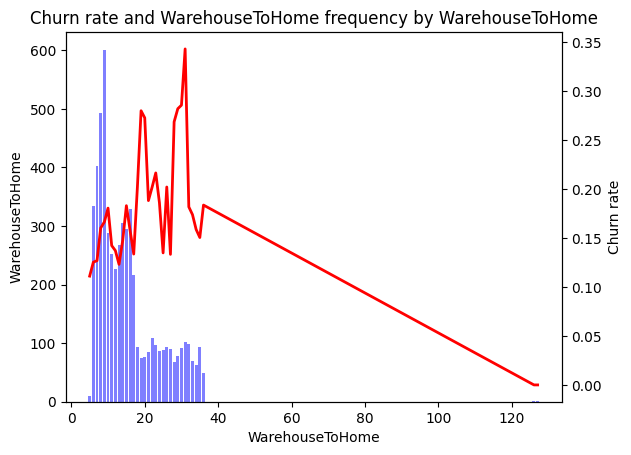

In [ ]:
churn_rate_by_WarehouseToHome = new_df.groupby('WarehouseToHome').agg({"Churn":np.mean}).sort_index()

# Calculate the frequency of each tenure
WarehouseToHome_freq = new_df['WarehouseToHome'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(WarehouseToHome_freq.index, WarehouseToHome_freq.values, color='blue', alpha=0.5, label='WarehouseToHome')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate_by_WarehouseToHome.index, churn_rate_by_WarehouseToHome.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('WarehouseToHome')
ax1.set_ylabel('WarehouseToHome')
ax2.set_ylabel('Churn rate')
plt.title('Churn rate and WarehouseToHome frequency by WarehouseToHome')


# Display the chart
plt.show()

WarehouseToHomeGroup
High    0.189837
Low     0.147826
Name: Churn, dtype: float64


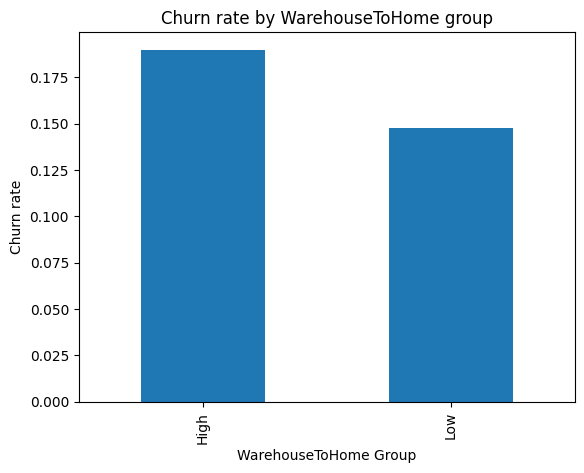

In [ ]:
WarehouseToHome_median = new_df['WarehouseToHome'].median()
new_df['WarehouseToHomeGroup'] = np.where(new_df['WarehouseToHome'] <= WarehouseToHome_median, 'Low', 'High')
churn_rate_by_cashback = new_df.groupby('WarehouseToHomeGroup')['Churn'].mean()
print(churn_rate_by_cashback)

churn_rate_by_cashback.plot(kind='bar')
plt.xlabel('WarehouseToHome Group')
plt.ylabel('Churn rate')
plt.title('Churn rate by WarehouseToHome group')
plt.show()

In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['Complain'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn        0    1
Complain           
0         3586  440
1         1096  508


Chi-square statistic: 350.92545525927073
Degrees of freedom: 1
p-value: 2.6644609654641377e-78


In [ ]:
C_mean = round(new_df.groupby("Complain")["Churn"].mean()*100,2).reset_index()
C_mean

,Complain,Churn
0,0,10.93
1,1,31.67


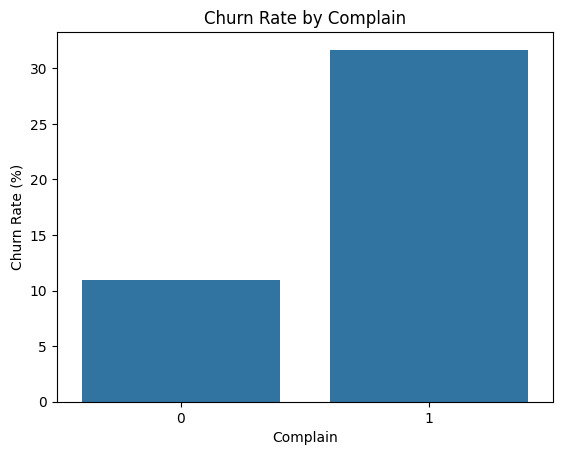

In [ ]:
sns.barplot(x="Complain", y="Churn", data=C_mean)

# set the axis labels and title
plt.xlabel("Complain")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Complain")

# show the plot
plt.show()

In [ ]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(new_df['SatisfactionScore'], new_df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn                 0    1
SatisfactionScore           
1                  1010  130
2                   503   73
3                  1460  305
4                   879  181
5                   830  259


Chi-square statistic: 68.97984636982241
Degrees of freedom: 4
p-value: 3.7266768784466044e-14


In [ ]:
SS_mean = round(new_df.groupby("SatisfactionScore")["Churn"].mean()*100,2).reset_index()
SS_mean

,SatisfactionScore,Churn
0,1,11.40
1,2,12.67
2,3,17.28
3,4,17.08
4,5,23.78


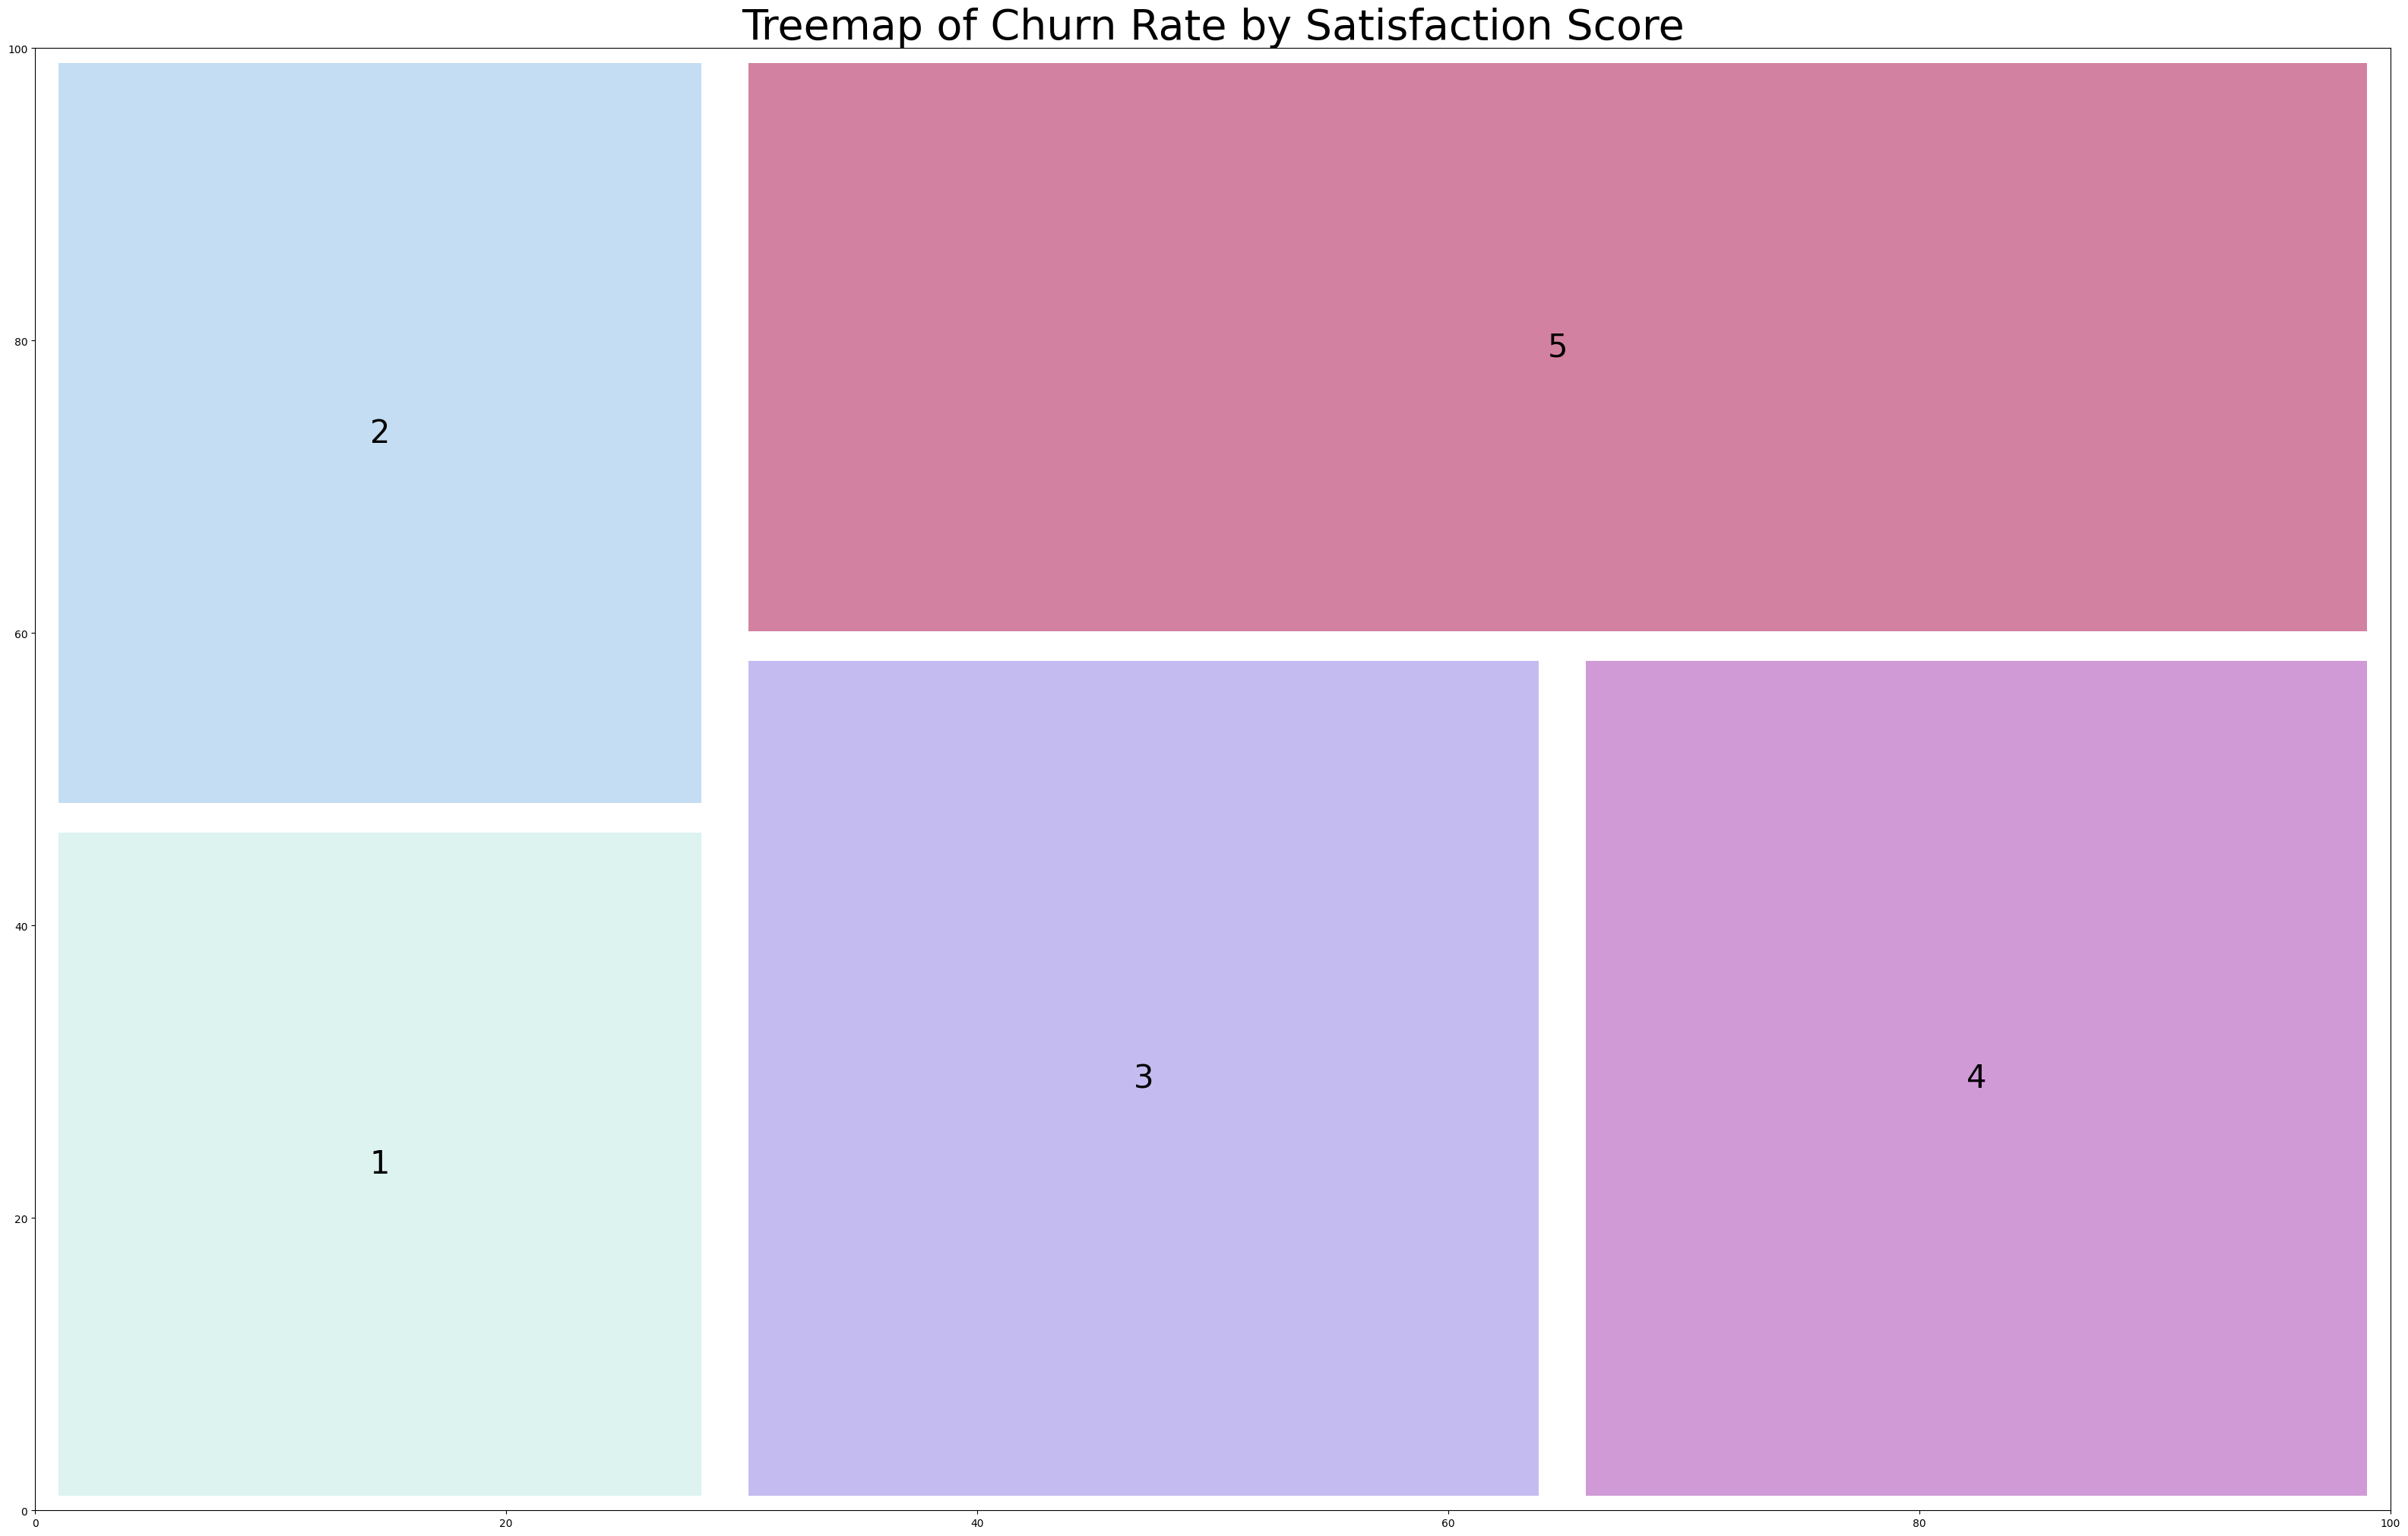

In [ ]:
axis = squarify.plot(sizes=SS_mean["Churn"],
                     label=SS_mean["SatisfactionScore"],
                     color=sns.color_palette('cubehelix_r', 12),
                     alpha=1,
                     pad=1,
                     text_kwargs={'fontsize': 30})
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of Churn Rate by Satisfaction Score", fontsize=40)
plt.show();
